# Customer Personality Prediction to Boost Marketing Campaign

**Customer Personality Prediction to Boost Marketing Campaign** refers to using predictive analytics and machine learning techniques to analyze customer data and predict the personality traits or preferences of individual customers. This information can then be leveraged to enhance the effectiveness of marketing campaigns by tailoring the content, messaging, and delivery methods to match the predicted personality traits of each customer.

![Sample Image](https://static.vecteezy.com/system/resources/previews/002/779/440/non_2x/audience-segmentation-concept-man-near-a-large-circular-chart-with-images-of-people-illustration-flat-vector.jpg)

# Import Required Libraries

In [ ]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Read Data

In [ ]:
 # read data
data=pd.read_csv('/kaggle/input/market-compagin-data/marketing_campaign_data.csv')

# Exploratory Data Analysis

In [ ]:
# get  information about the data
# get datatype for each features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [ ]:
# get names of features
data.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
# make description of daat
# compute mean-max-min ....
data.describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1119.500000,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,646.776623,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,559.750000,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1119.500000,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1679.250000,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,2239.000000,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
# get the datatypes for each features
data.dtypes

Unnamed: 0               int64
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntCoke                  int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [ ]:
# select features with integer datatypes
int_data=data.select_dtypes('int')
int_data

,Unnamed: 0,ID,Year_Birth,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,0,0,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,1,1,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,0,0,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,1,0,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,1,0,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,0,1,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,2236,4001,1946,2,1,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,2237,7270,1981,0,0,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,2238,8235,1956,0,1,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [ ]:
# select features with object datatypes
object_data=data.select_dtypes('object')
object_data

,Education,Marital_Status,Dt_Customer
0,S1,Lajang,04-09-2012
1,S1,Lajang,08-03-2014
2,S1,Bertunangan,21-08-2013
3,S1,Bertunangan,10-02-2014
4,S3,Menikah,19-01-2014
...,...,...,...
2235,S1,Menikah,13-06-2013
2236,S3,Bertunangan,10-06-2014
2237,S1,Cerai,25-01-2014
2238,S2,Bertunangan,24-01-2014


In [ ]:
# select features with float datatypes
float64_data=data.select_dtypes('float64')
float64_data

,Income
0,58138000.0
1,46344000.0
2,71613000.0
3,26646000.0
4,58293000.0
...,...
2235,61223000.0
2236,64014000.0
2237,56981000.0
2238,69245000.0


In [ ]:
# get the length of Data
len(data['ID'].unique())

2240

**Year Birth**

In [ ]:
# get the first year when individuals begin enrolling on the website (first person enroll)
data["Year_Birth"].min()

1893

In [ ]:
# get the last year when individuals enrolling on the website (last person enroll)
data["Year_Birth"].max()

1996

In [ ]:
# get the mean of years that customers enrolling on the website
int("{:.0f}".format(round(data["Year_Birth"].mean(),0)))

1969

In [ ]:
# find out how many individuals sign up each year
data.groupby('Year_Birth').size()

Year_Birth
1893     1
1899     1
1900     1
1940     1
1941     1
1943     7
1944     7
1945     8
1946    16
1947    16
1948    21
1949    30
1950    29
1951    43
1952    52
1953    35
1954    50
1955    49
1956    55
1957    43
1958    53
1959    51
1960    49
1961    36
1962    44
1963    45
1964    42
1965    74
1966    50
1967    44
1968    51
1969    71
1970    77
1971    87
1972    79
1973    74
1974    69
1975    83
1976    89
1977    52
1978    77
1979    53
1980    39
1981    39
1982    45
1983    42
1984    38
1985    32
1986    42
1987    27
1988    29
1989    30
1990    18
1991    15
1992    13
1993     5
1994     3
1995     5
1996     2
dtype: int64

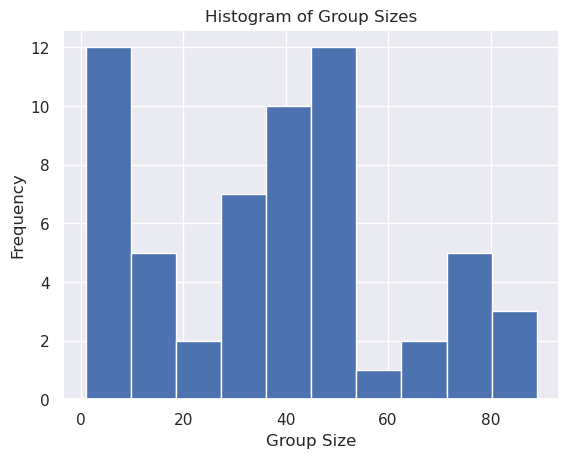

In [ ]:
# plot Histogram and KDE that represent the number of people who sign up each year
group_sizes = data.groupby('Year_Birth').size()
group_sizes.plot.hist()

plt.xlabel('Group Size')
plt.ylabel('Frequency')
plt.title('Histogram of Group Sizes')
plt.show()

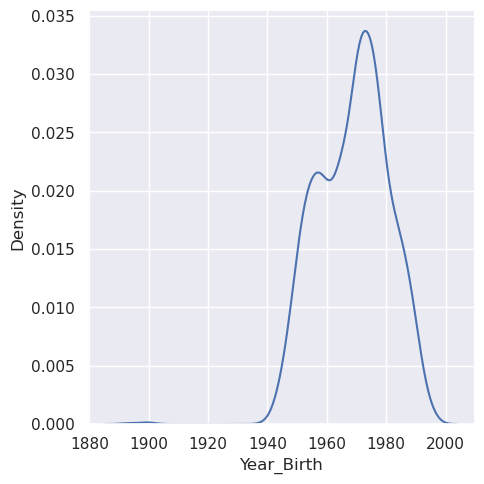

In [ ]:
# plot the distribution of Year_Birth
sns.displot(x="Year_Birth",data=data,kind='kde')

**Education**

In [ ]:
# determine the number of people at each level of education
data['Education'].value_counts()

S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: Education, dtype: int64

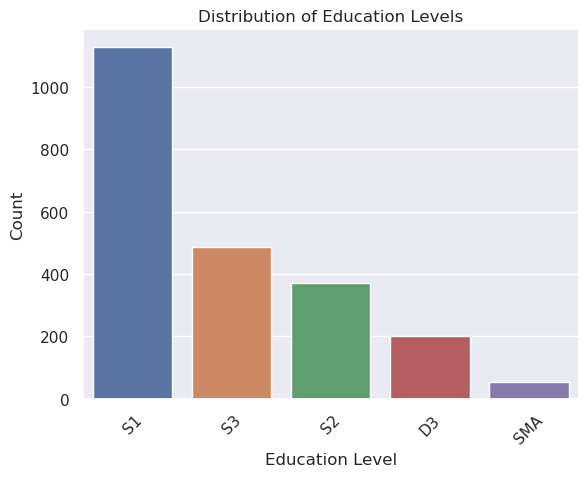

In [ ]:
# Define the desired order of categories
education_order = ["S1", "S3", "S2", "D3", "SMA"]
# Create the countplot with ordered categories
sns.countplot(x="Education", data=data, order=education_order)
#Start plotting
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**Marital Status**

In [ ]:
# get the unique values in  Marital_Status feature
data['Marital_Status'].unique()

array(['Lajang', 'Bertunangan', 'Menikah', 'Cerai', 'Janda', 'Duda'],
      dtype=object)

In [ ]:
# determine the number of people in each Marital_Status
data['Marital_Status'].value_counts()

Menikah        864
Bertunangan    580
Lajang         484
Cerai          232
Janda           77
Duda             3
Name: Marital_Status, dtype: int64

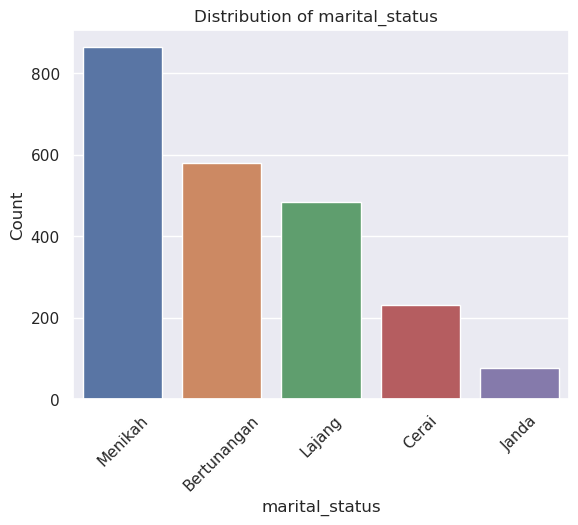

In [ ]:
# Define the desired order of categories
marital_status = ["Menikah", "Bertunangan", "Lajang", "Cerai", "Janda"]

# Create the countplot with ordered categories
sns.countplot(x="Marital_Status", data=data, order=marital_status)
#Start plotting
plt.xlabel('marital_status')
plt.ylabel('Count')
plt.title('Distribution of marital_status  ')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**Income**

In [ ]:
# obtain the maximum annual income for all users that have registered on the website
data['Income'].min()

1730000.0

In [ ]:
 # obtain the maximum annual income for all users that have registered on the website
data['Income'].max()

666666000.0

In [ ]:
 # obtain the mean of annual income for all users that have registered on the website
data['Income'].mean()

52247251.35379061

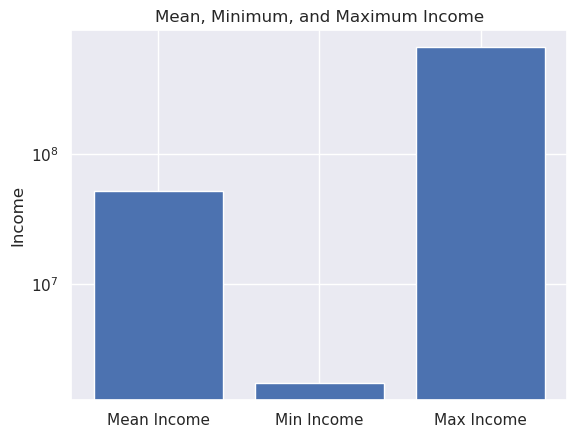

In [ ]:
# Calculate mean, minimum, and maximum income
mean_income = data['Income'].mean()
min_income = data['Income'].min()
max_income = data['Income'].max()

# Create a bar plot
plt.bar(['Mean Income', 'Min Income', 'Max Income'], [mean_income, min_income, max_income])

plt.ylabel('Income')
plt.title('Mean, Minimum, and Maximum Income')

# Set the y-axis to a logarithmic scale to accommodate small and large values
plt.yscale('log')
plt.show()


**Kidhome**

In [ ]:
# determine the number of users that have no children, one child, or three children
data['Kidhome'].value_counts()

0    1293
1     899
2      48
Name: Kidhome, dtype: int64

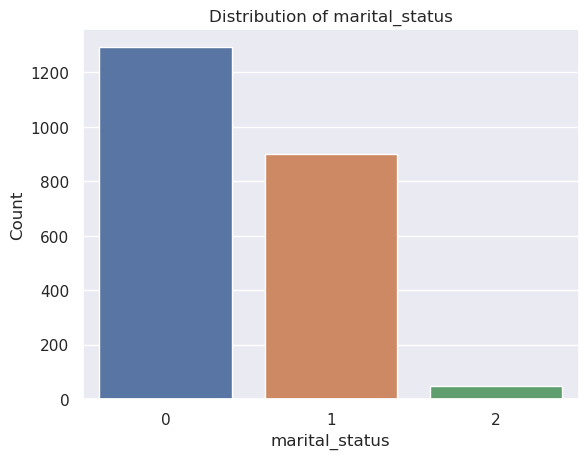

In [ ]:
# Create the countplot with ordered categories
sns.countplot(x="Kidhome", data=data)
#Start plotting
plt.xlabel('marital_status')
plt.ylabel('Count')
plt.title('Distribution of marital_status')
plt.show()

**Teenhome**

In [ ]:
# detdetermine the number of users who do not have a teenhome, have one teenhome, or have three teenhomes
data['Teenhome'].value_counts()

0    1158
1    1030
2      52
Name: Teenhome, dtype: int64

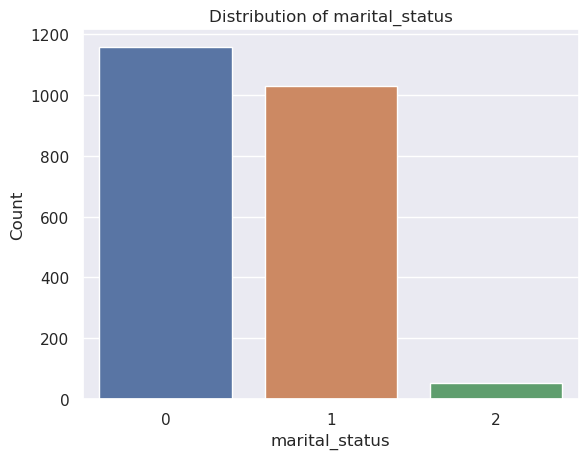

In [ ]:
# Create the countplot with ordered categories
sns.countplot(x="Teenhome", data=data)
#Start plotting
plt.xlabel('marital_status')
plt.ylabel('Count')
plt.title('Distribution of marital_status')
plt.show()

**Dt_Customer**

In [ ]:
# convert Dt_Customer from object to datetime
data['Dt_Customer']=pd.to_datetime(data['Dt_Customer'])

In [ ]:
# get year,month and day from Dt_Customer
data['enter_year']=data['Dt_Customer'].dt.year
data['enter_month']=data['Dt_Customer'].dt.month
data['enter_day']=data['Dt_Customer'].dt.day

In [ ]:
# print month
data['enter_month']

0        4
1        8
2        8
3       10
4        1
        ..
2235     6
2236    10
2237     1
2238     1
2239    10
Name: enter_month, Length: 2240, dtype: int64

In [ ]:
# drop Dt_Customer
data = data.drop('Dt_Customer', axis=1)

In [ ]:
 # get features to ensure that the Dt_Customer dropped
data.dtypes

Unnamed: 0               int64
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntCoke                  int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
enter_year               int64
enter_month              int64
enter_day                int64
dtype: o

In [ ]:
 # get the number of users that enrolled in each year
data['enter_year'].value_counts()

2013    1189
2014     557
2012     494
Name: enter_year, dtype: int64

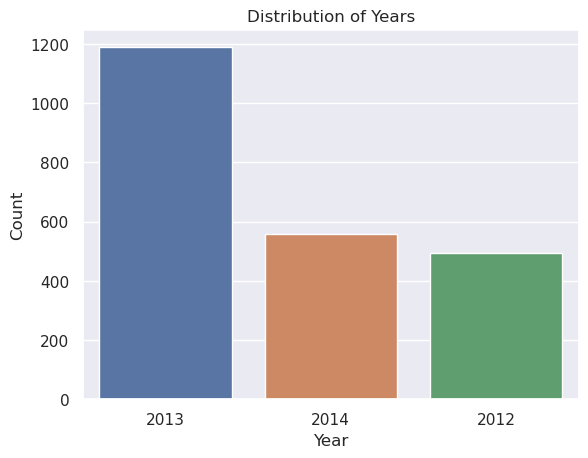

In [ ]:
# Create the countplot with ordered categories
y=[2013,2014,2012]
sns.countplot(x="enter_year", data=data,order=y)
#Start plotting
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Years')
plt.show()

In [ ]:
# get the number of users that enrolled in each month over three year
data['enter_month'].value_counts()

8     211
10    209
3     202
12    202
5     192
1     191
2     187
11    185
4     184
6     170
9     166
7     141
Name: enter_month, dtype: int64

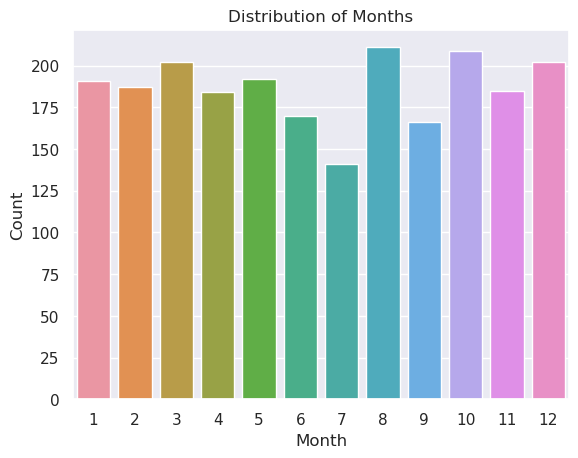

In [ ]:
# Create the countplot with ordered categories
sns.countplot(x="enter_month", data=data,)
#Start plotting
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution of Months')
plt.show()

**Recency**

In [ ]:
 # get the minimum number of days since the customer's last purchase
data['Recency'].min()

0

In [ ]:
# get the maximum number of days since the customer's last purchase
data['Recency'].max()

99

In [ ]:
# get the mean number of days since the customer's last purchase
int("{:.0f}".format(round(data["Recency"].mean(),0)))

49

In [ ]:
# get the unique number of Recency
data['Recency'].unique()

array([58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91,
       86, 41, 42, 63,  0, 69, 89,  4, 96, 56, 31,  8, 55, 37, 76, 99,  3,
       88, 80, 72, 24, 92, 39, 29,  2, 54, 57, 30, 12, 18, 75, 90,  1, 25,
       40,  9, 87,  5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27,
       74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77,
       81, 14, 52, 93, 50, 60, 66, 97, 62,  6, 33, 67, 22, 71,  7])

**MntCoke**

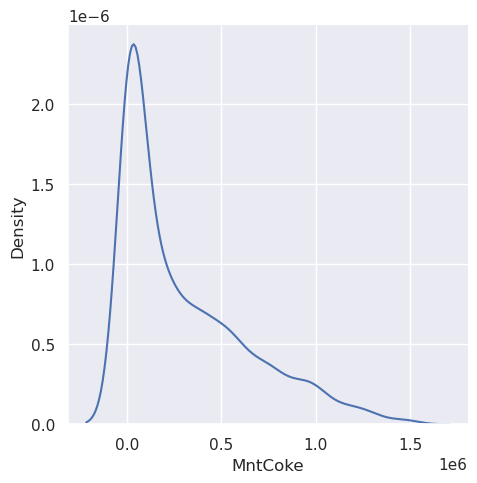

In [ ]:
# plot the distribution of MntCoke
sns.displot(data=data,x='MntCoke',kind='kde')

In [ ]:
# get the mean amount of money spent on Coke by customers in the last two years
int("{:.0f}".format(round(data["MntCoke"].mean(),0)))

303936

In [ ]:
# get the greatest amount of money spent on Coke by customers in the last two years
data['MntCoke'].max()

1493000

In [ ]:
# get the smallest amount of money spent on Coke by customers in the last two years
data['MntCoke'].min()

0

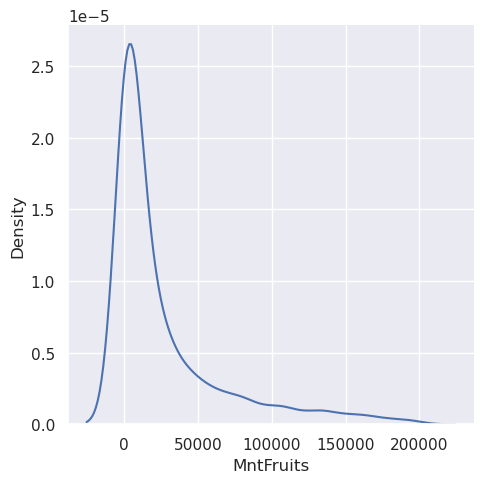

In [ ]:
# plot the distribution of MntFruits
sns.displot(data=data,x='MntFruits',kind='kde')

In [ ]:
# get the largest amount of money spent on Fruits by customers in the last two years
data['MntFruits'].min()

0

In [ ]:
# get the smallest amount of money spent on Fruits by customers in the last two years
data['MntFruits'].max()

199000

In [ ]:
# get the mean amount of money spent on Fruits by customers in the last two years
int("{:.0f}".format(round(data["MntFruits"].mean(),0)))

26302

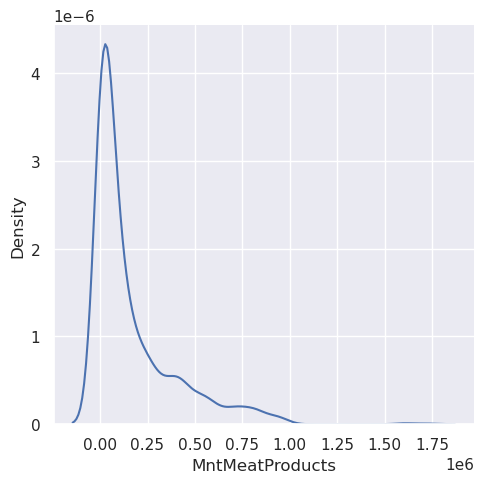

In [ ]:
# plot the distribution of MntMeatProducts
sns.displot(data=data,x='MntMeatProducts',kind='kde')

In [ ]:
# get the mean amount of money spent on Meat by customers in the last two years
int("{:.0f}".format(round(data["MntMeatProducts"].mean(),0)))

166950

In [ ]:
# get the largest amount of money spent on Meat by customers in the last two years
data['MntMeatProducts'].max()

1725000

In [ ]:
# get the smallest amount of money spent on Meat by customers in the last two years
data['MntMeatProducts'].min()

0

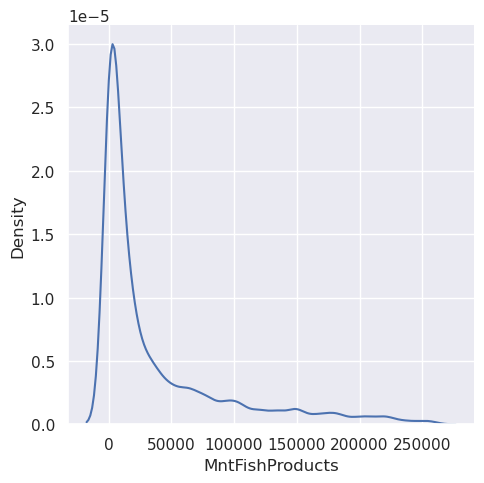

In [ ]:
# plot the distribution of MntFishProducts
sns.displot(data=data,x='MntFishProducts',kind='kde',bw_adjust=0.5)

In [ ]:
# get the smallest amount of money spent on Fish by customers in the last two years
data['MntFishProducts'].min()

0

In [ ]:
# get the largest amount of money spent on Fish by customers in the last two years
data['MntFishProducts'].max()

259000

In [ ]:
# get the mean amount of money spent on Fish by customers in the last two years
int("{:.0f}".format(round(data["MntFishProducts"].mean(),0)))

37525

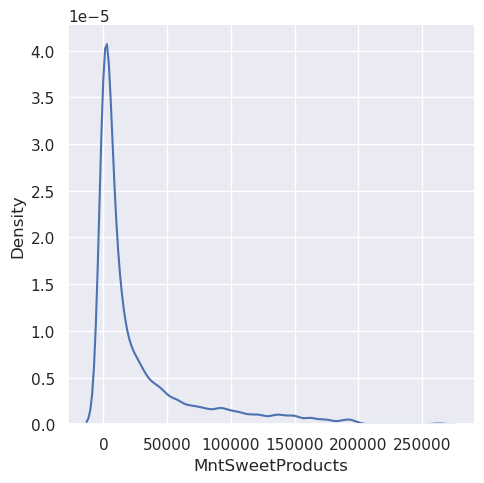

In [ ]:
# plot the distribution of MntSweetProducts
sns.displot(data=data,x='MntSweetProducts',kind='kde',bw_adjust=0.5)

In [ ]:
# get the largest amount of money spent on Sweet by customers in the last two years
data['MntSweetProducts'].max()

263000

In [ ]:
# get the smallest amount of money spent on Sweet by customers in the last two years
data['MntSweetProducts'].min()

0

In [ ]:
# get the mean amount of money spent on Sweet by customers in the last two years
int("{:.0f}".format(round(data["MntSweetProducts"].mean(),0)))

27063

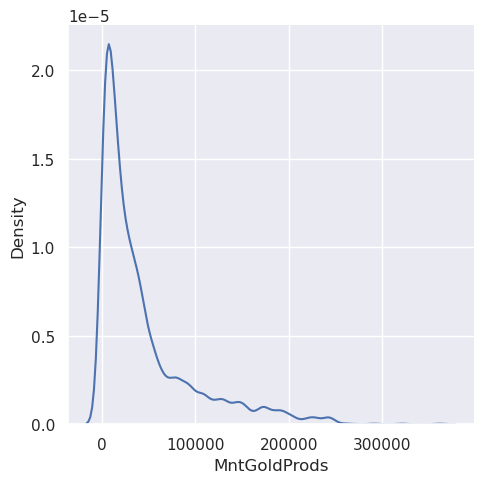

In [ ]:
# plot the distribution of MntGoldProds
sns.displot(data=data,x='MntGoldProds',kind='kde',bw_adjust=0.5)

In [ ]:
# get the smallest amount of money spent on Gold by customers in the last two years
data['MntGoldProds'].min()

0

In [ ]:
# get the largest amount of money spent on Gold by customers in the last two years
data['MntGoldProds'].max()

362000

In [ ]:
# get the mean amount of money spent on Gold by customers in the last two years
int("{:.0f}".format(round(data["MntGoldProds"].mean(),0)))

44022

get the mean values for each feature('MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds') and plot the values

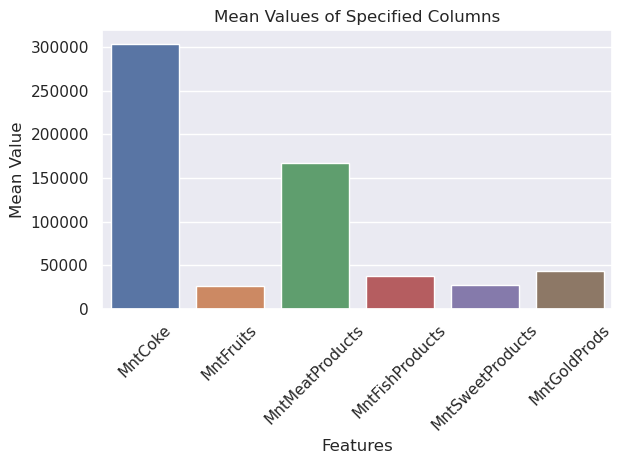

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data'

# List of columns to calculate mean values for
columns_to_plot = ['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate mean values for the specified columns
mean_values = data[columns_to_plot].mean()

# Create a bar plot of mean values
sns.barplot(x=mean_values.index, y=mean_values.values)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Mean Values of Specified Columns')
plt.tight_layout()

plt.show()


get the maximum values for each feature('MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds') and plot the values

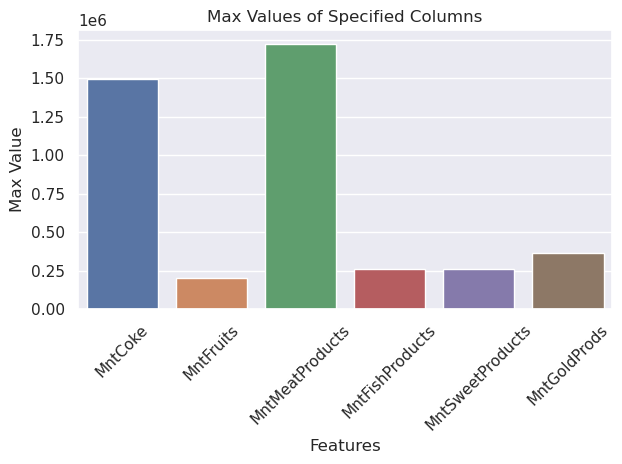

In [ ]:
# List of columns to calculate maximum values for
columns_to_plot = ['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate maximum values for the specified columns
max_values = data[columns_to_plot].max()

# Create a bar plot of maximum values
sns.barplot(x=max_values.index, y=max_values.values)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Max Value')
plt.title('Max Values of Specified Columns')
plt.tight_layout()
plt.show()

**AcceptedCmp3**

In [ ]:
data['AcceptedCmp3'].value_counts()

0    2077
1     163
Name: AcceptedCmp3, dtype: int64

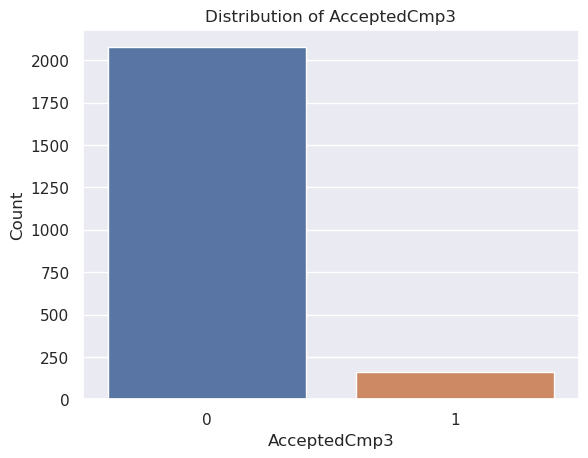

In [ ]:
sns.countplot(x="AcceptedCmp3", data=data)
#Start plotting
plt.xlabel('AcceptedCmp3')
plt.ylabel('Count')
plt.title('Distribution of AcceptedCmp3')
plt.show()

**AcceptedCmp4**

In [ ]:
data['AcceptedCmp4'].value_counts()

0    2073
1     167
Name: AcceptedCmp4, dtype: int64

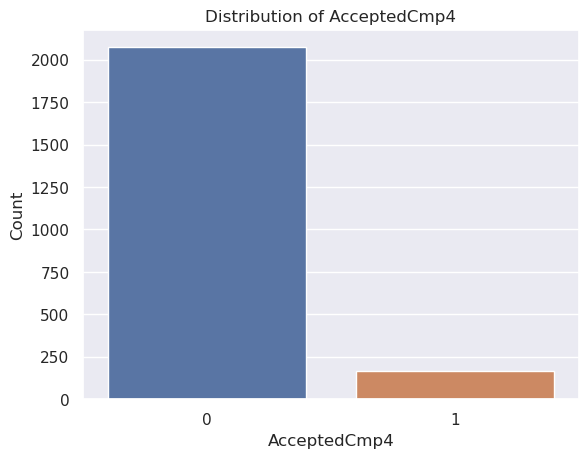

In [ ]:
sns.countplot(x="AcceptedCmp4", data=data)
#Start plotting
plt.xlabel('AcceptedCmp4')
plt.ylabel('Count')
plt.title('Distribution of AcceptedCmp4')
plt.show()

**AcceptedCmp5**

In [ ]:
data['AcceptedCmp5'].value_counts()

0    2077
1     163
Name: AcceptedCmp5, dtype: int64

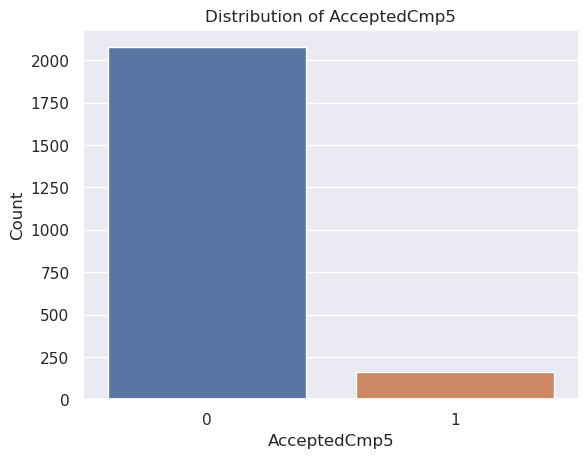

In [ ]:
sns.countplot(x="AcceptedCmp5", data=data)
#Start plotting
plt.xlabel('AcceptedCmp5')
plt.ylabel('Count')
plt.title('Distribution of AcceptedCmp5')
plt.show()

**AcceptedCmp1**

In [ ]:
data['AcceptedCmp1'].value_counts()

0    2096
1     144
Name: AcceptedCmp1, dtype: int64

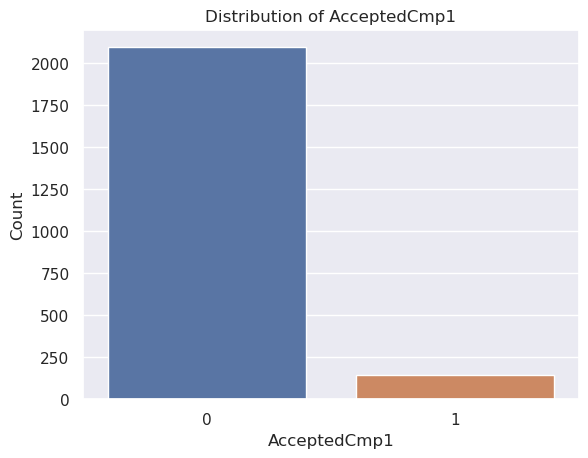

In [ ]:
sns.countplot(x="AcceptedCmp1", data=data)
#Start plotting
plt.xlabel('AcceptedCmp1')
plt.ylabel('Count')
plt.title('Distribution of AcceptedCmp1')
plt.show()

**AcceptedCmp2**

In [ ]:
data['AcceptedCmp2'].value_counts()

0    2210
1      30
Name: AcceptedCmp2, dtype: int64

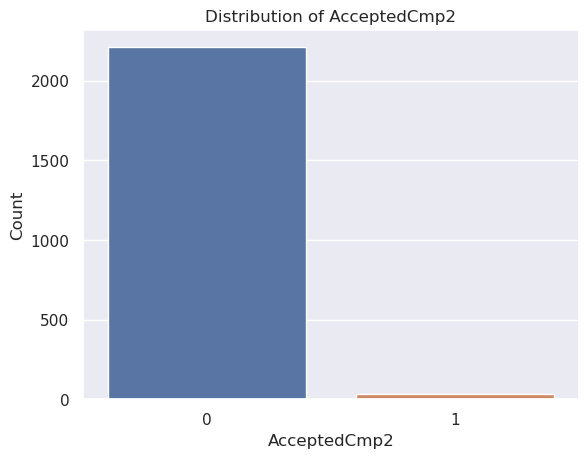

In [ ]:
sns.countplot(x="AcceptedCmp2", data=data)
#Start plotting
plt.xlabel('AcceptedCmp2')
plt.ylabel('Count')
plt.title('Distribution of AcceptedCmp2')
plt.show()

Determine the number of customers who reject to participate in each marketing campaign.

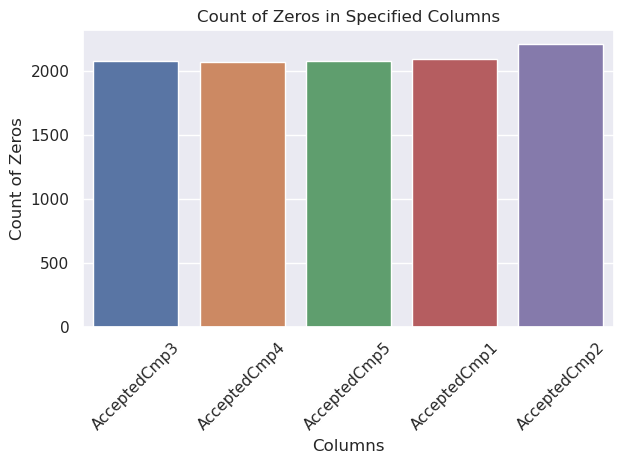

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data'

# List of columns with zeros you want to analyze
columns_with_zeros = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']

# Create a DataFrame containing only the specified columns
columns_data = data[columns_with_zeros]

# Count occurrences of 0 in each column
zero_counts = (columns_data == 0).sum()

# Create a bar plot of zero counts
sns.barplot(x=zero_counts.index, y=zero_counts.values)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Columns')
plt.ylabel('Count of Zeros')
plt.title('Count of Zeros in Specified Columns')
plt.tight_layout()

plt.show()


Determine the number of customers who accepted to participate in each marketing campaign.


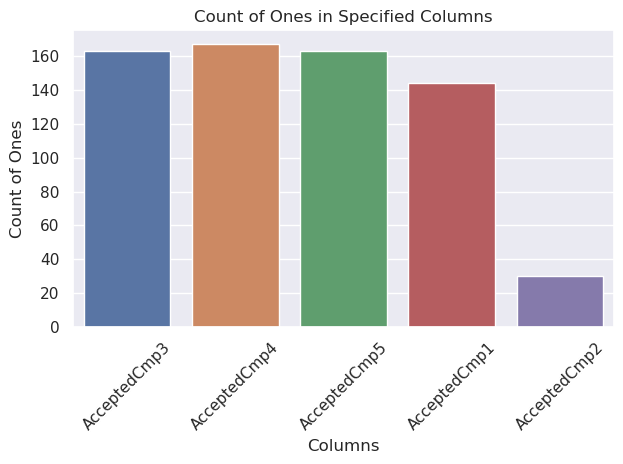

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data'

# List of columns with zeros you want to analyze
columns_with_ones= ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']

# Create a DataFrame containing only the specified columns
columns_data = data[columns_with_ones]

# Count occurrences of 0 in each column
one_counts = (columns_data == 1).sum()

# Create a bar plot of zero counts
sns.barplot(x=one_counts.index, y=one_counts.values)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Columns')
plt.ylabel('Count of Ones')
plt.title('Count of Ones in Specified Columns')
plt.tight_layout()

plt.show()


**Complain**

In [ ]:
#calculate the proportion of people who complain and those who do not complain
data['Complain'].value_counts(normalize=True)

0    0.990625
1    0.009375
Name: Complain, dtype: float64

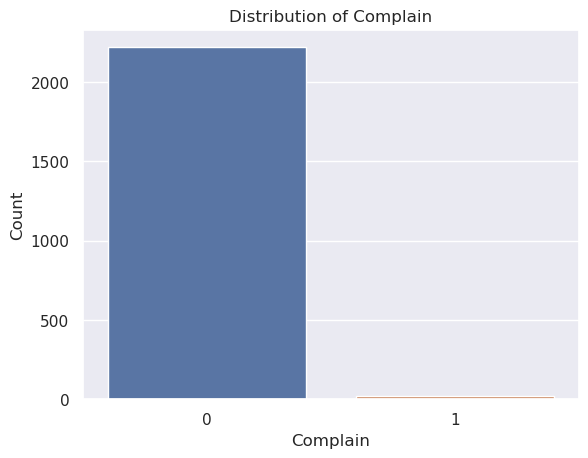

In [ ]:
sns.countplot(x="Complain", data=data)
#Start plotting
plt.xlabel('Complain')
plt.ylabel('Count')
plt.title('Distribution of Complain')
plt.show()

**Z_CostContact**

In [ ]:
# Cost Contact for each customer
# the cost is fixed
data['Z_CostContact'].value_counts()

3    2240
Name: Z_CostContact, dtype: int64

**Z_Revenue**

In [ ]:
# Revenue form cintact each customer
# the revenue is fixed
data['Z_Revenue'].value_counts()

11    2240
Name: Z_Revenue, dtype: int64

**Response**

In [ ]:
# the number of customers that responded positively to the last campaign.
data['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

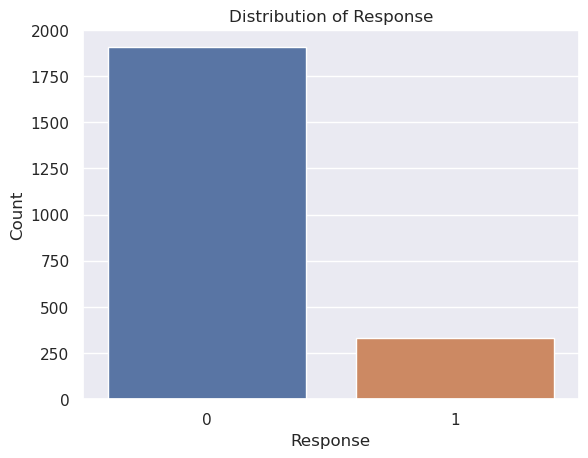

In [ ]:
sns.countplot(x="Response", data=data)
#Start plotting
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Distribution of Response')
plt.show()

**Drop Unnamed:0 , ID**

In [ ]:
# Drop Unnamed: 0 and ID from table
data.drop(columns=['Unnamed: 0', 'ID'], inplace=True)

**Distribution of Marital Status by Response**

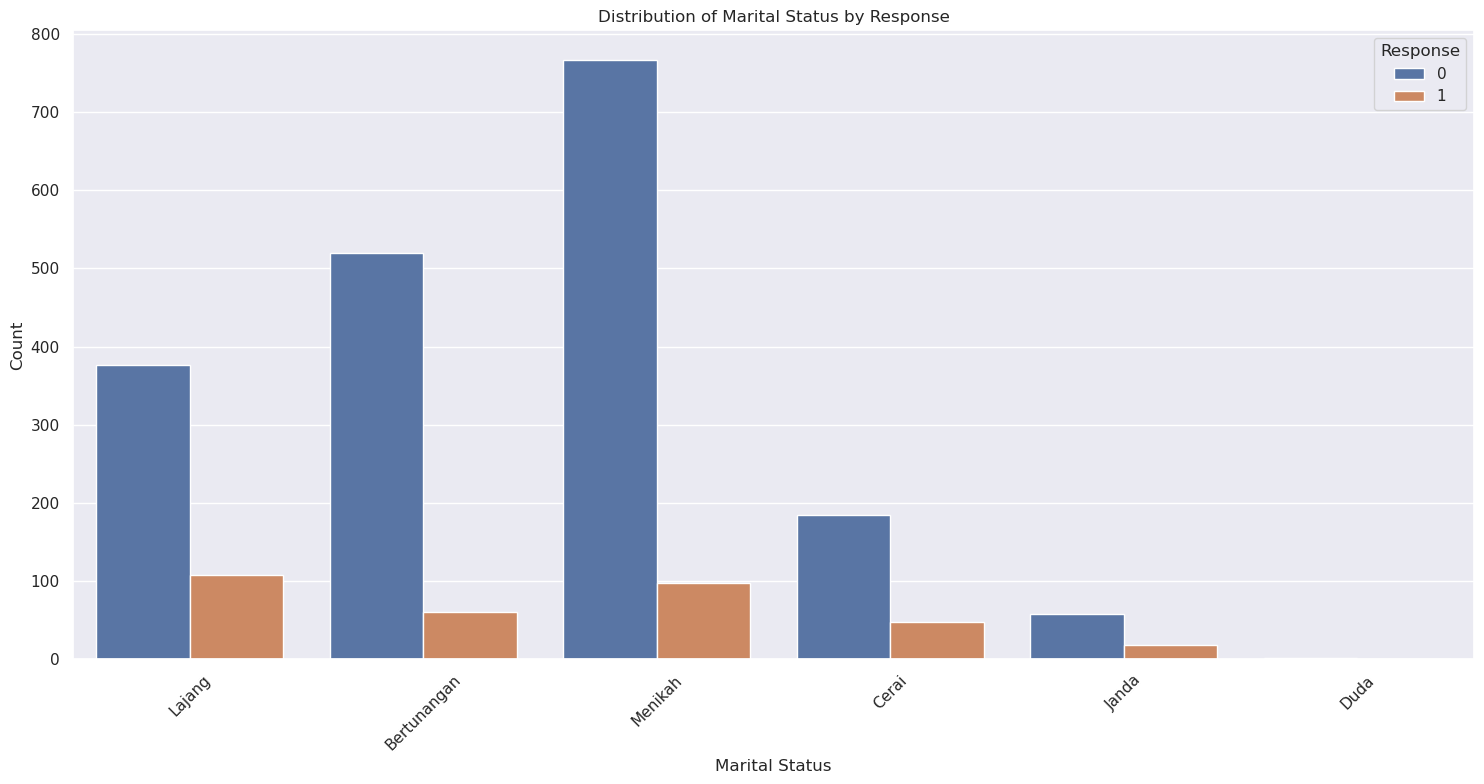

In [ ]:
# Create a countplot with marital_status and hue as Response
plt.figure(figsize=(15, 8))
sns.countplot(x='Marital_Status', hue='Response', data=data)

plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status by Response')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Response')
plt.tight_layout()
plt.show()

**Distribution of Education by Response**

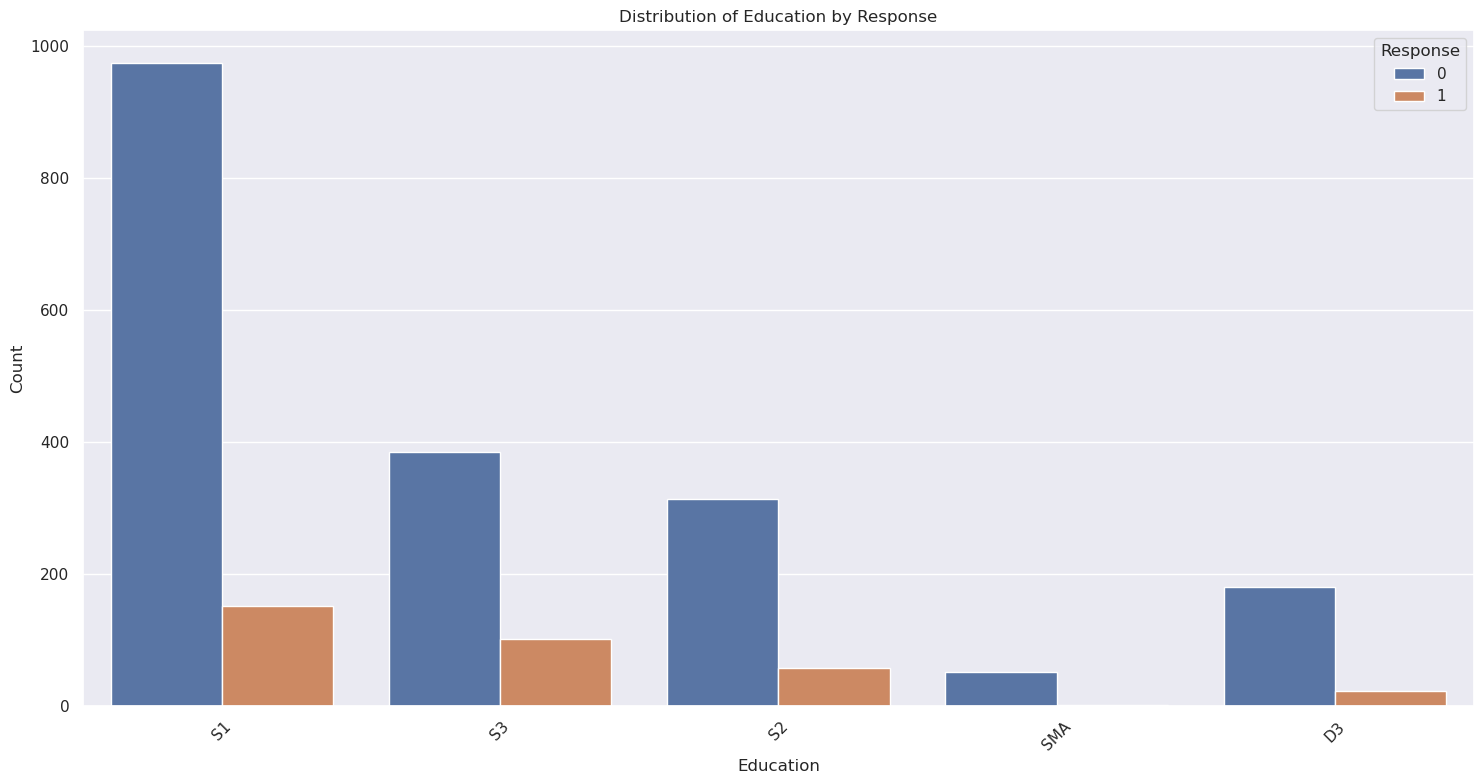

In [ ]:
# Create a countplot with marital_status and hue as Response
plt.figure(figsize=(15, 8))
sns.countplot(x='Education', hue='Response', data=data)

plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Education by Response')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Response')
plt.tight_layout()
plt.show()

**Distribution of Year_Birth by Response**

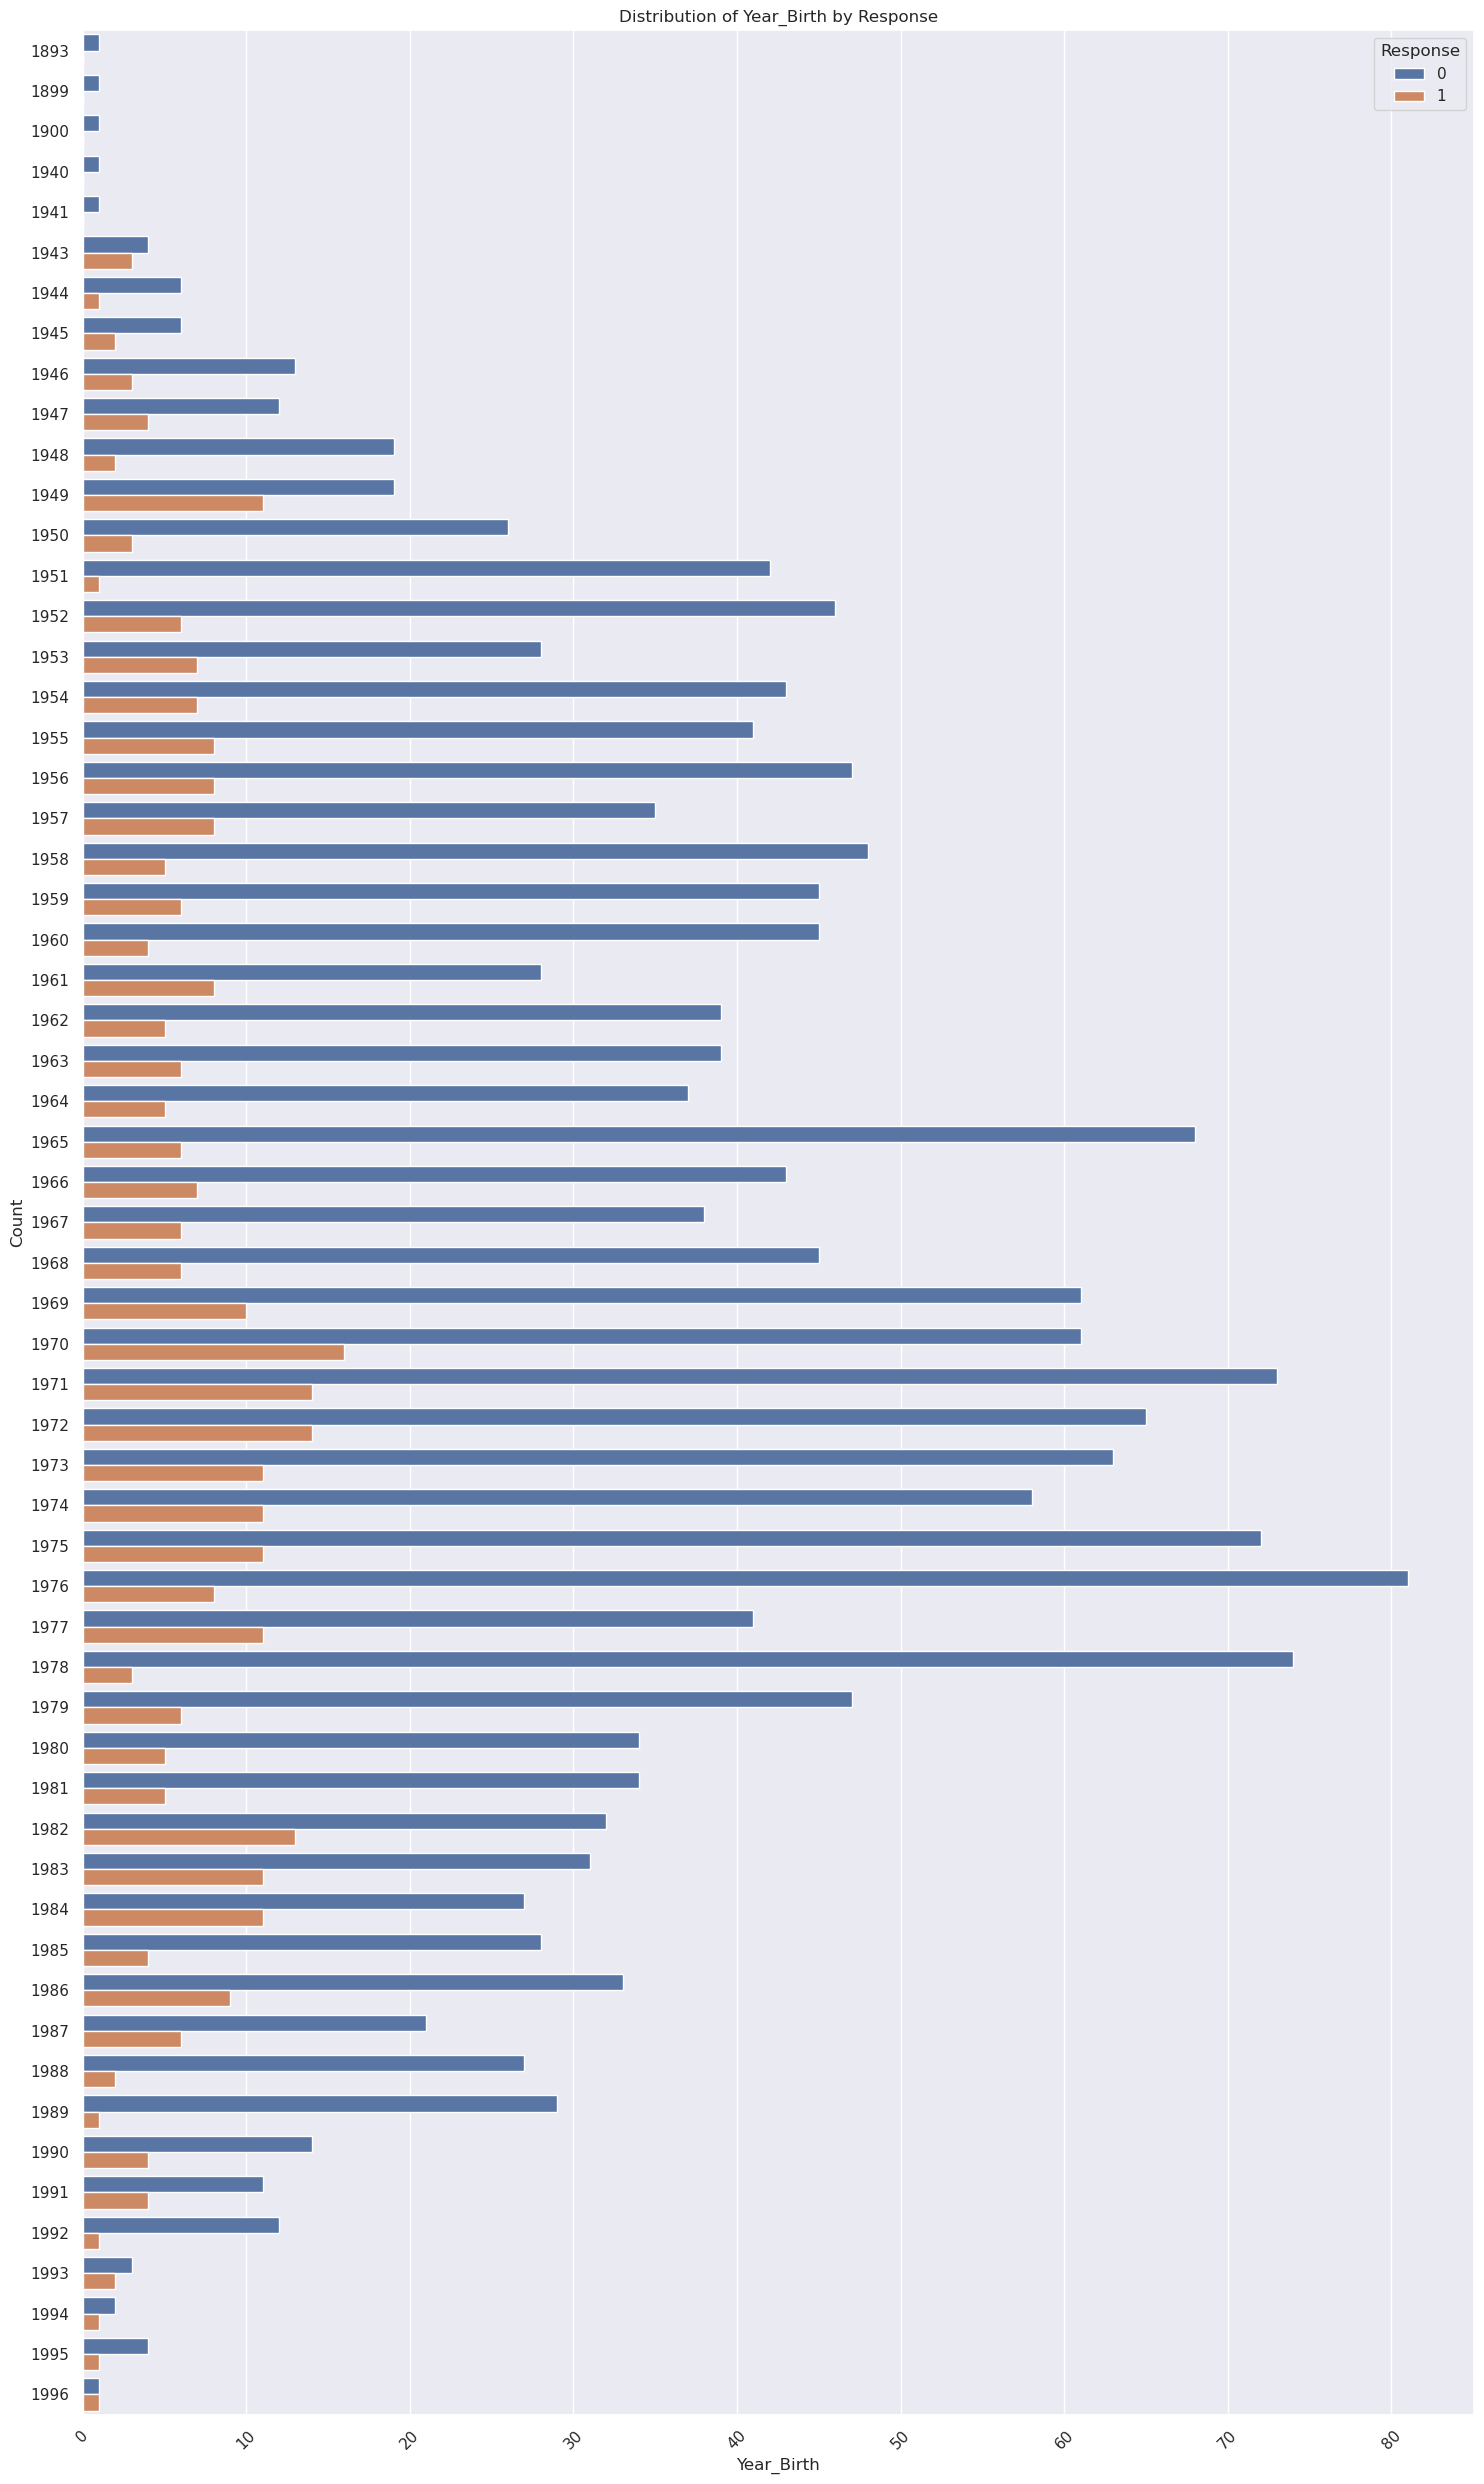

In [ ]:

# Create a countplot with marital_status and hue as Response
plt.figure(figsize=(15, 25))
sns.countplot(y='Year_Birth', hue='Response', data=data)

plt.xlabel('Year_Birth')
plt.ylabel('Count')
plt.title('Distribution of Year_Birth by Response')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Response')
plt.tight_layout()
plt.show()

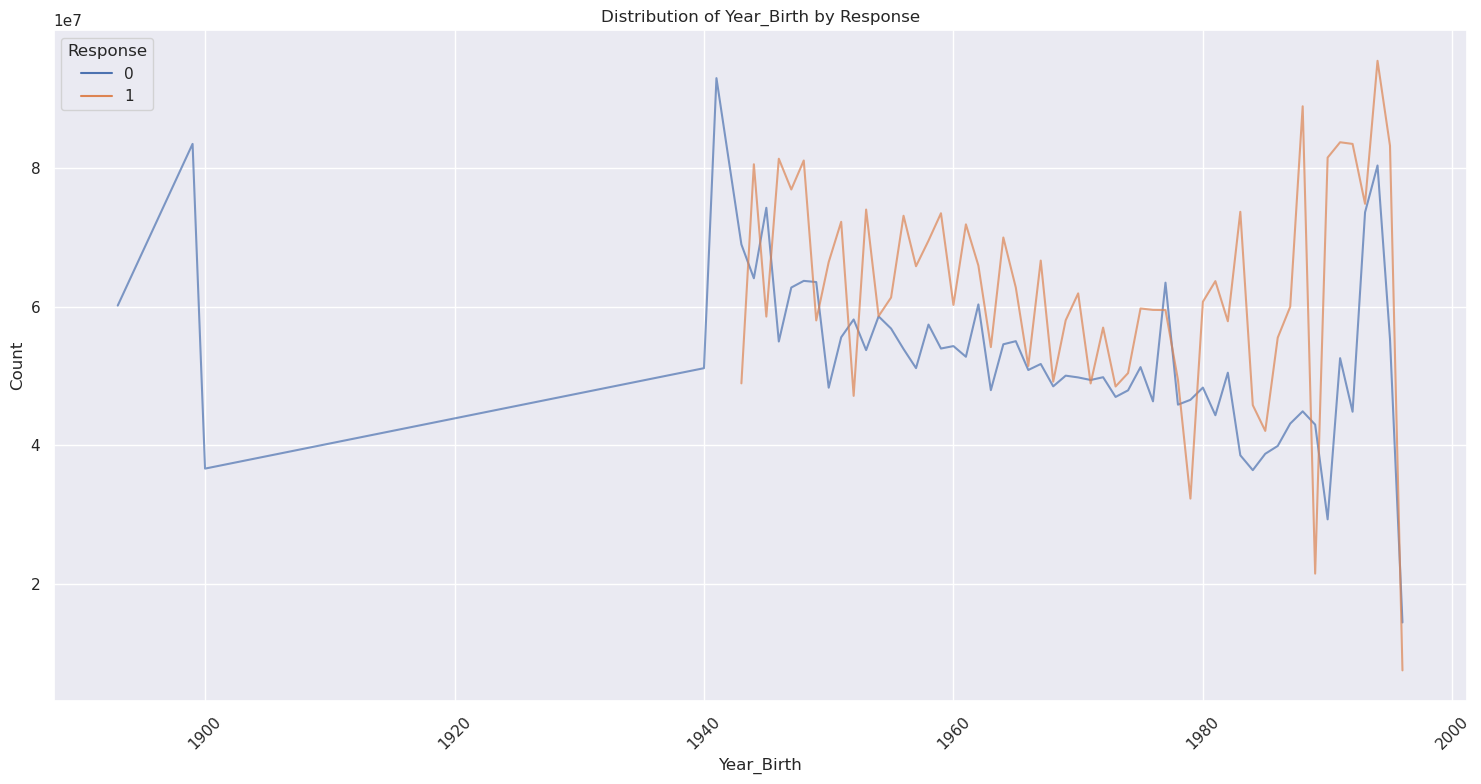

In [ ]:
# Create a countplot with marital_status and hue as Response
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year_Birth', y='Income', hue='Response', data=data, ci=None, estimator='mean', alpha=0.7)

plt.xlabel('Year_Birth')
plt.ylabel('Count')
plt.title('Distribution of Year_Birth by Response')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Response')
plt.tight_layout()
plt.show()

**Distribution of Features as Pie Charts**

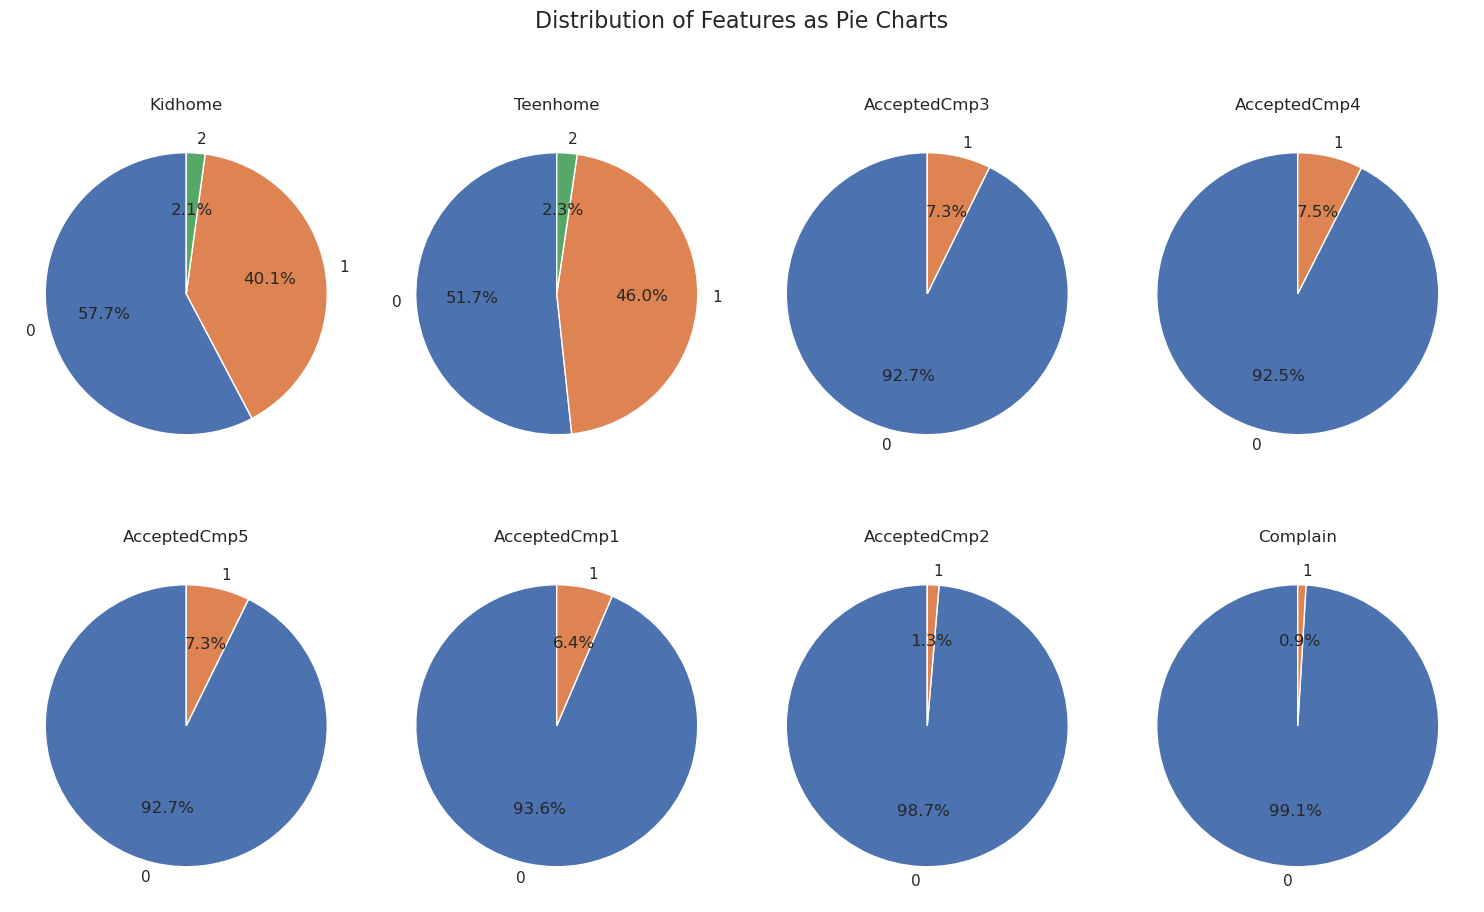

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data'

# List of features to plot
features_to_plot = ['Kidhome', 'Teenhome', 'AcceptedCmp3', 'AcceptedCmp4',
                    'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain']

# Set up the figure with multiple subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
fig.suptitle('Distribution of Features as Pie Charts', fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each feature as a pie chart
for i, feature in enumerate(features_to_plot):
    value_counts = data[feature].value_counts()
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(feature)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


**Compute boxplots for set of features**

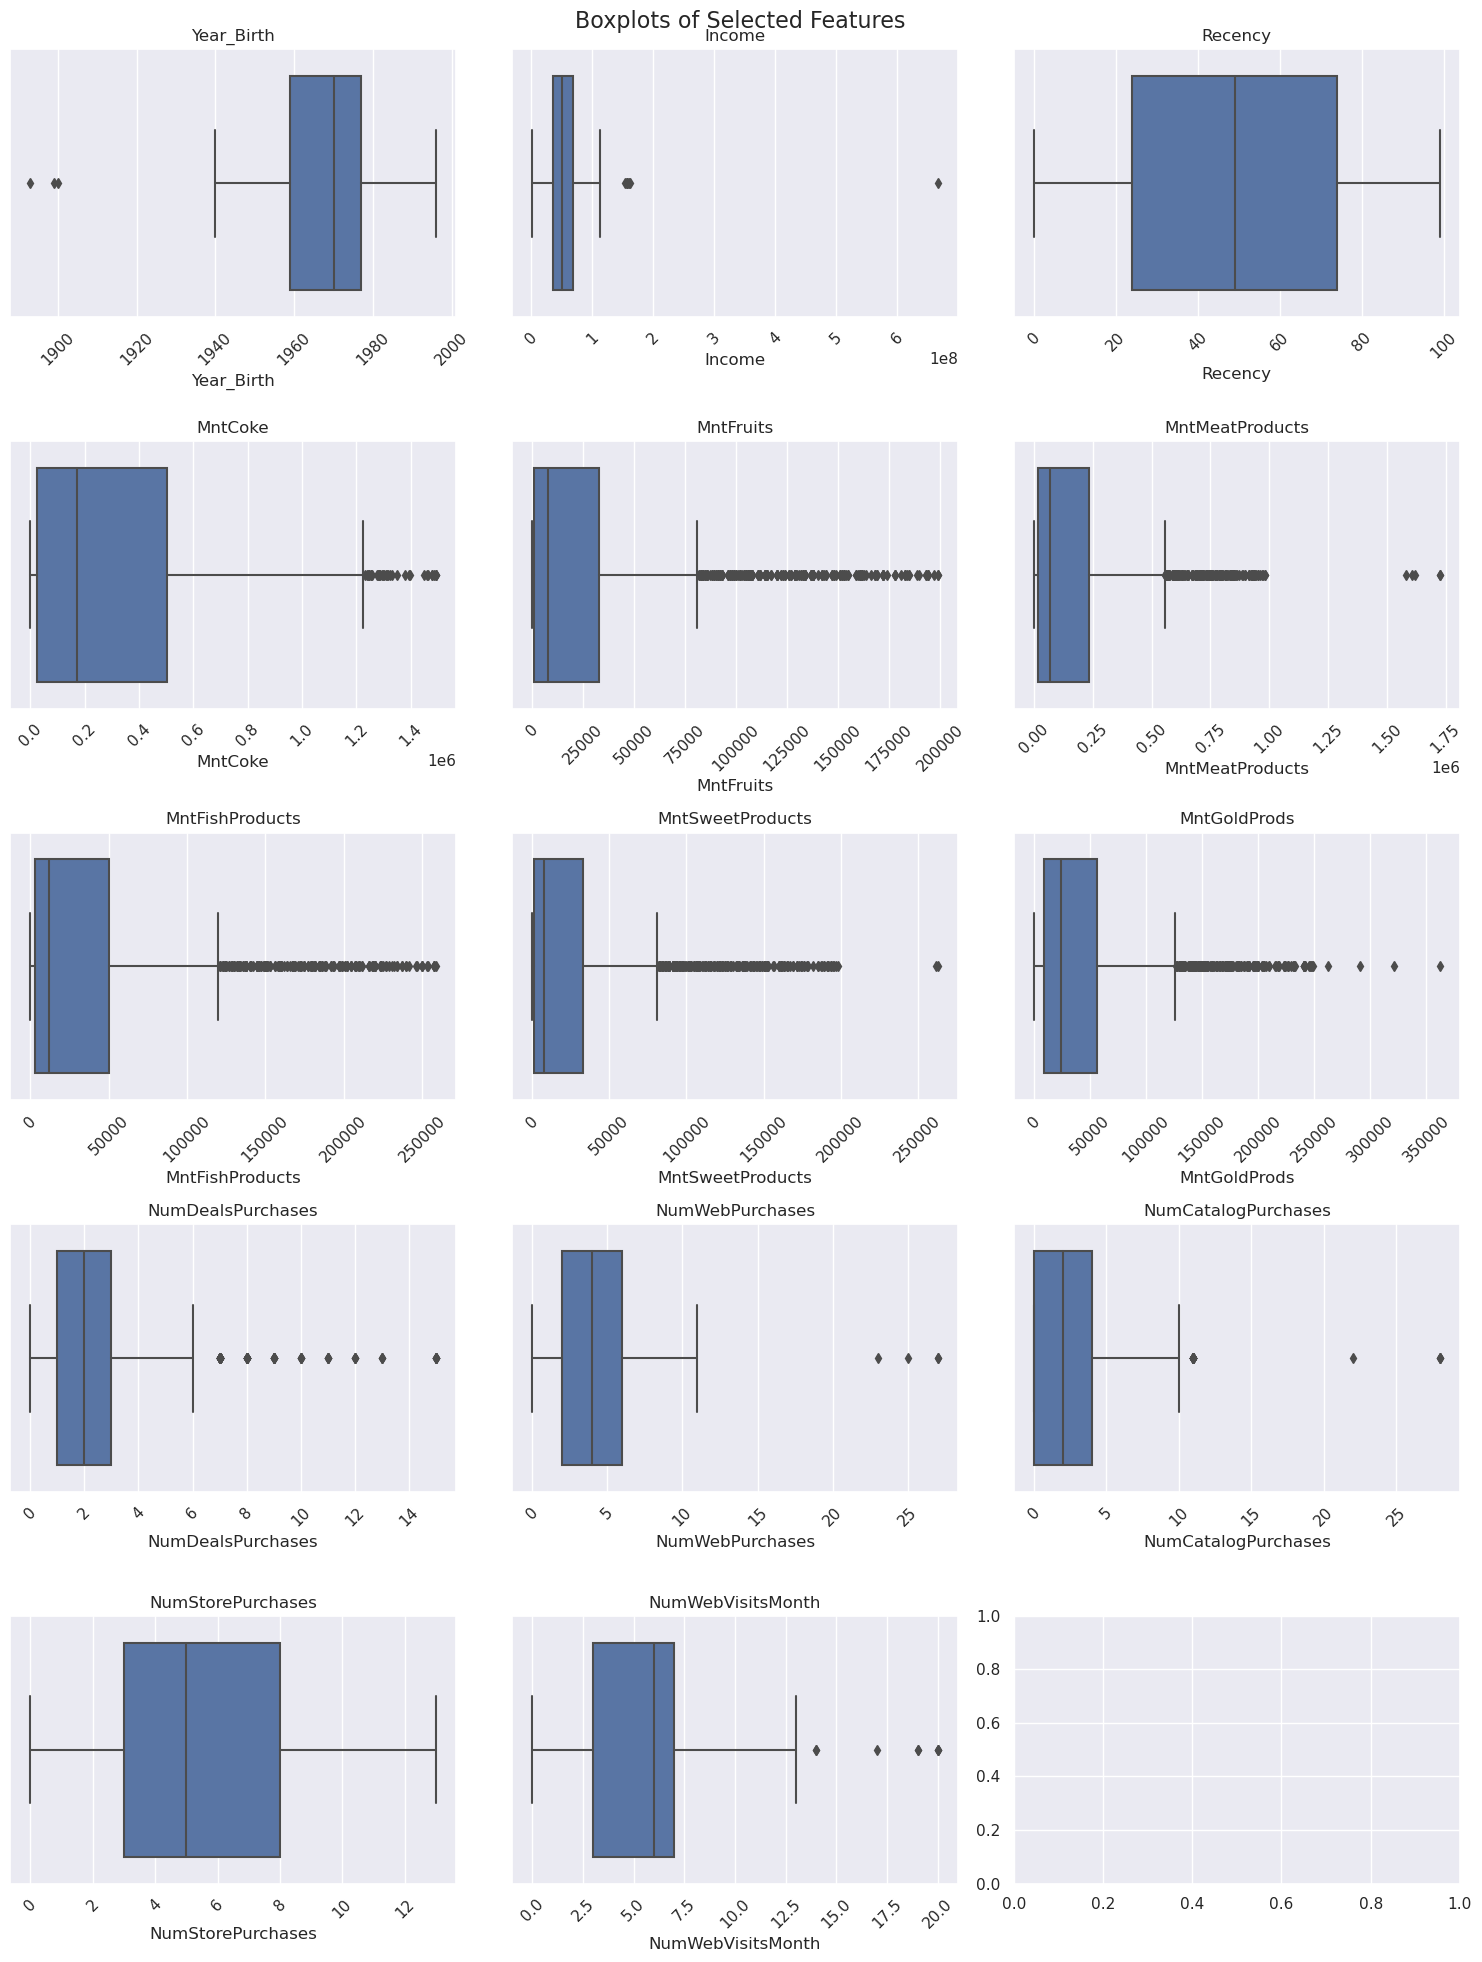

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data'

# List of features to plot
features_to_plot = ['Year_Birth', 'Income', 'Recency', 'MntCoke', 'MntFruits',
                    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                    'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                    'NumStorePurchases', 'NumWebVisitsMonth']

# Set up the figure with multiple subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
fig.suptitle('Boxplots of Selected Features', fontsize=16)

# Iterate through the features and plot boxplots
for i, feature in enumerate(features_to_plot):
    row = i // 3
    col = i % 3

    sns.boxplot(x=data[feature], ax=axes[row, col])
    axes[row, col].set_title(feature)
    axes[row, col].tick_params(axis='x', rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


**Compute boxplots for set of features by Response**

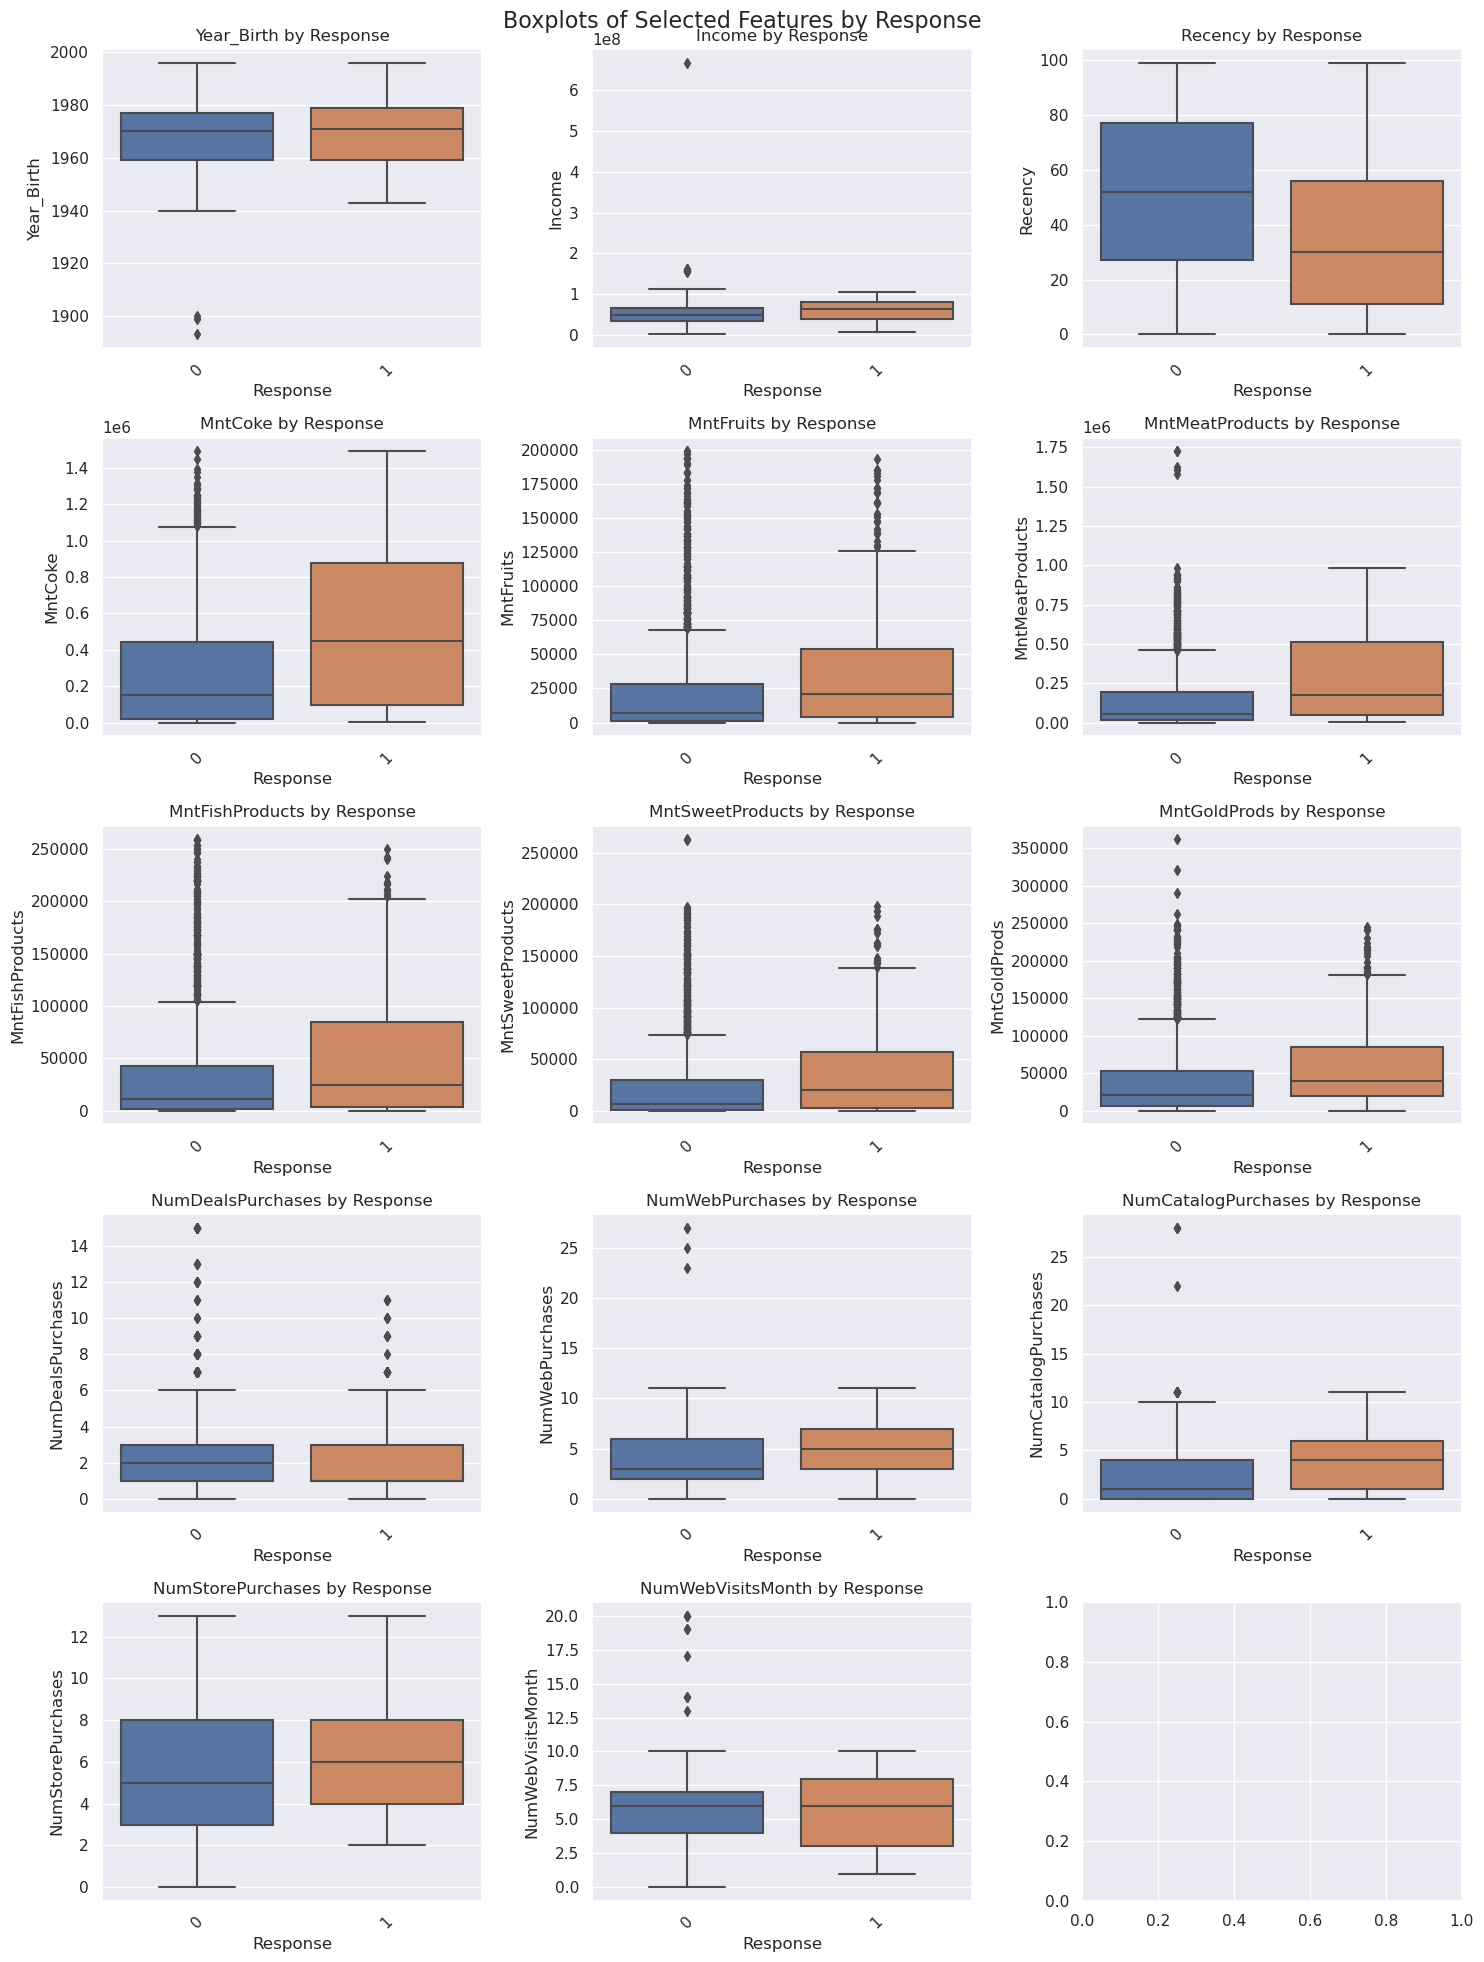

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data'

# List of features to plot
features_to_plot = ['Year_Birth', 'Income', 'Recency', 'MntCoke', 'MntFruits',
                    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                    'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                    'NumStorePurchases', 'NumWebVisitsMonth']

# Set up the figure with multiple subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
fig.suptitle('Boxplots of Selected Features by Response', fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot boxplots for each feature with respect to Response
for i, feature in enumerate(features_to_plot):
    sns.boxplot(x='Response', y=feature, data=data, ax=axes[i])
    axes[i].set_title(f'{feature} by Response')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# Data Preprocessing

In [ ]:
# drop 'Z_CostContact', 'Z_Revenue' features
# I dropped the because  each feature have the same values
# all values of 'Z_CostContact' is 3  , and all values of 'Z_Revenue' is 11
data.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

**check null values**

In [ ]:
# check null values
(data.isna().sum()/len(data))*100

Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Recency                0.000000
MntCoke                0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
enter_year             0.000000
enter_month            0.000000
enter_day              0.000000
dtype: float64

In [ ]:
# get the shape of data
data.shape

(2240, 28)

In [ ]:
# drop rows that contain null in "Income" column
data.dropna(inplace=True)

In [ ]:
# get the shape of data again after dropping rows that contain null in "Income" column
data.shape

(2216, 28)

**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is named 'data'

# List of object features to encode
object_features = ['Marital_Status', 'Education']  # Add your object features here

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to each object feature
for feature in object_features:
    data[feature] = label_encoder.fit_transform(data[feature])

# Now the object features are encoded with numerical values

In [ ]:
data['Marital_Status'].unique()

array([4, 0, 5, 1, 3, 2])

In [ ]:
data['Education'].unique()

array([1, 3, 2, 4, 0])

**Draw Heatmap**

<Axes: >

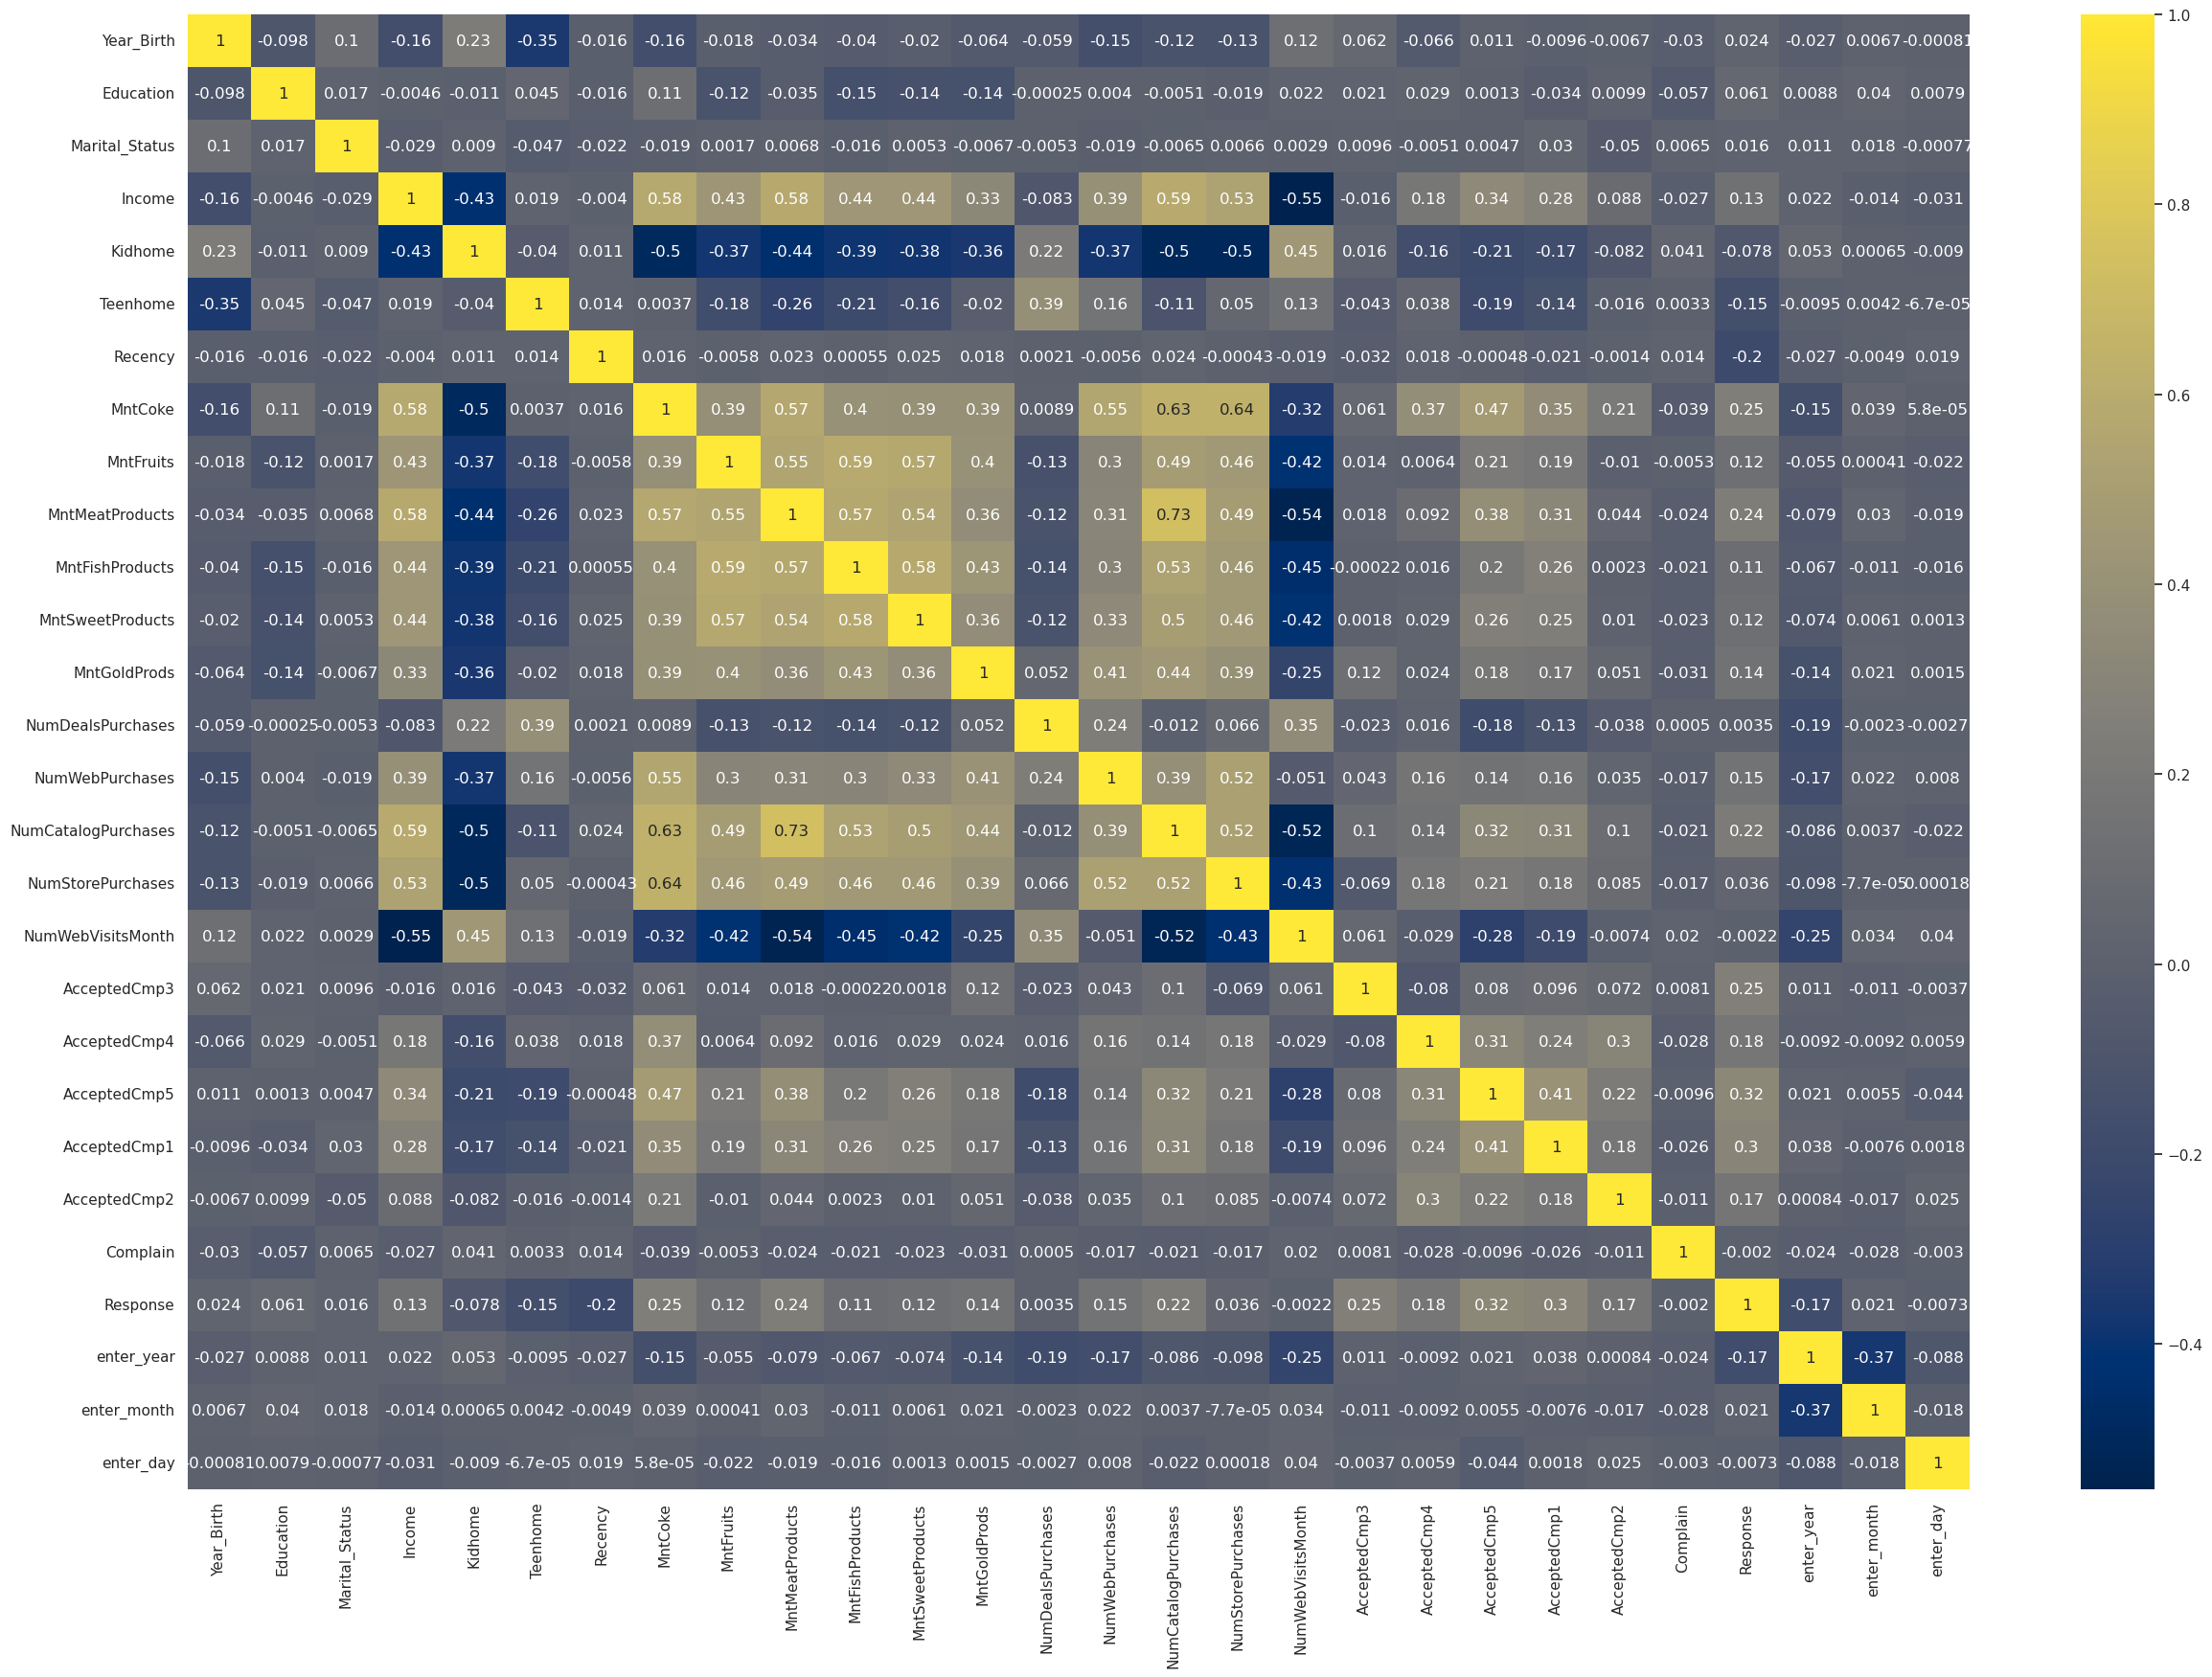

In [ ]:
#Correlation Heatmap (print the correlation score each variables)
plt.figure(figsize=(30, 20))
color_palette = "cividis"
sns.heatmap(data.corr(), fmt='.2g', cmap=color_palette, annot=True)

# Models

**Train & Test split**

In [ ]:
from sklearn.model_selection import train_test_split
X=data.drop('Response', axis=1)
y=data['Response']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Remove outlier from Train data**

data points that significantly differ from the majority of other data points in a dataset. They are observations that are unusually distant from the central tendency of the data distribution. In other words, outliers are data values that lie far away from the mean or median of a dataset.


![image](https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/amar-outlier-definition-01-1608019076.png)

In [ ]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['Year_Birth', 'Income', 'MntCoke', 'MntFruits',
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
            'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                    'NumCatalogPurchases', 'NumWebVisitsMonth']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

  ### Random Forest

**Hyperparameter Tuning**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 100, 'random_state': 42}


**Train**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth= 10, max_features='log2', n_estimators=100, random_state=42, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='log2', random_state=42)

**Prediction**

In [ ]:
 # make an prediction
y_pred = rfc.predict(X_test)

**Compute metrics**

In [ ]:
 # compute the metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8716216216216216
Precision Score :  0.8716216216216216
Recall Score :  0.8716216216216216
Jaccard Score :  0.7724550898203593
Log Loss :  4.627225772927202


**Plot the evalution metrics**

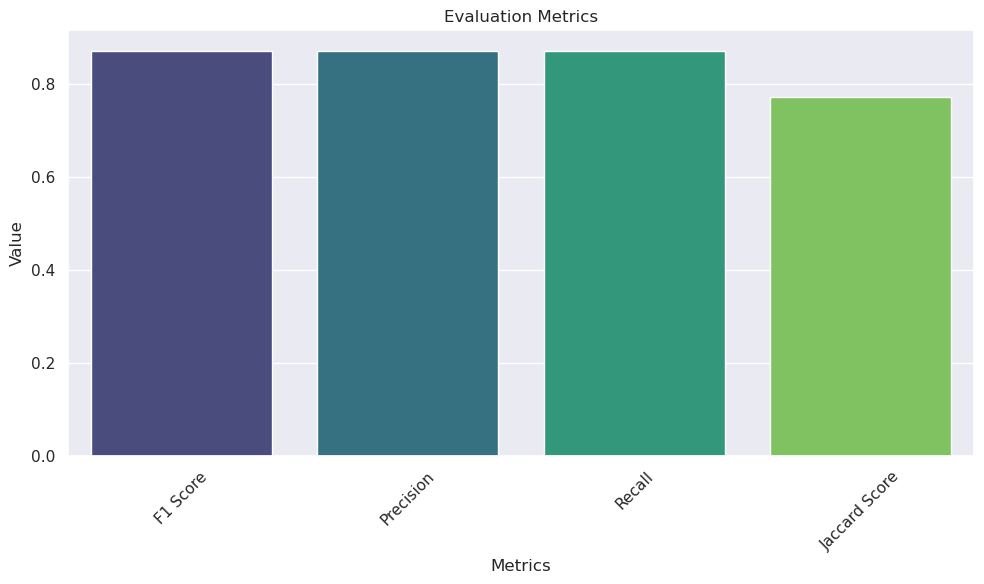

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, jaccard_score, log_loss

# Assuming you have defined y_test and y_pred

# Calculate the metrics
f1 = f1_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
jaccard = jaccard_score(y_test, y_pred, average='micro')

# Create a bar plot for the metrics
metrics = ['F1 Score', 'Precision', 'Recall', 'Jaccard Score']
values = [f1, precision, recall, jaccard]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Evaluation Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Get the top 10 importance feature whole the data**

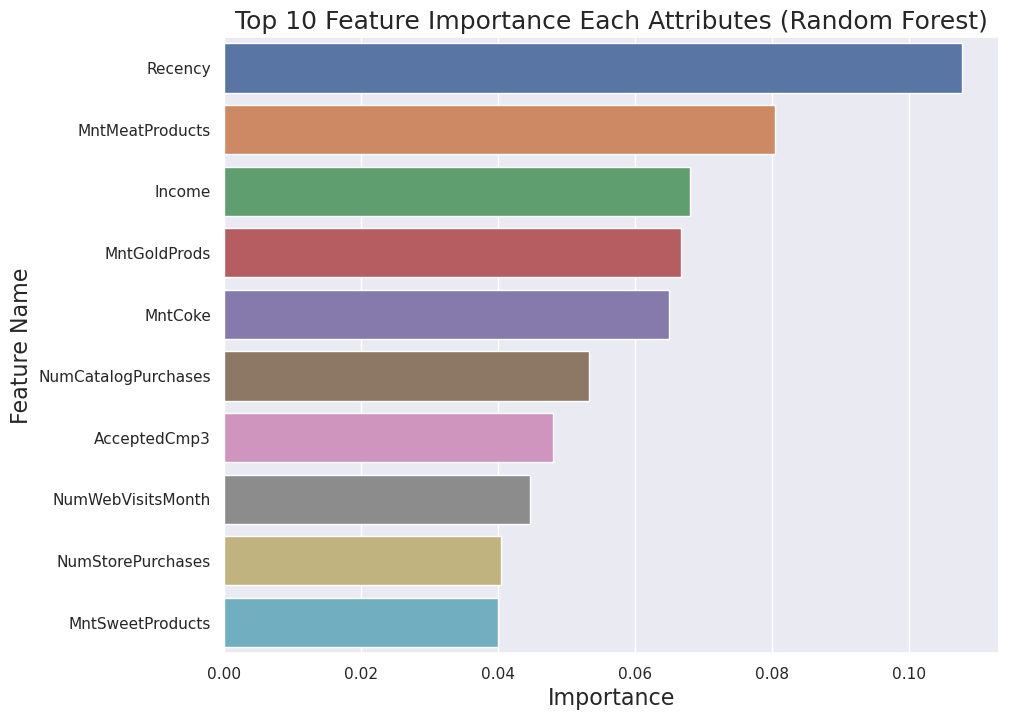

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

**Confusion matrix**

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.8716216216216216')

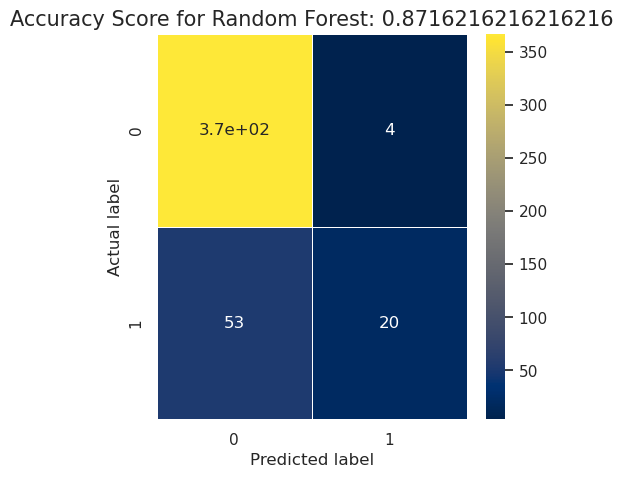

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,cmap=color_palette)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

**Plot AUC / ROC**

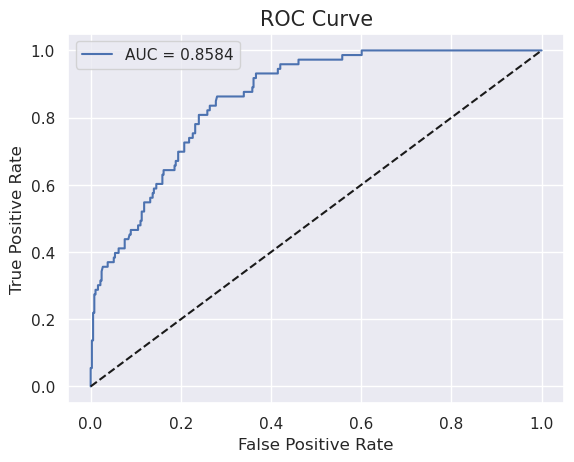

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

### Decision Tree

**Hyperparameter Tuning**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


**Train**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=8, min_samples_leaf=2, min_samples_split=2, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=2,
                       random_state=0)

**Prediction**

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)

**Compute metrics**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.7139639639639641
Precision Score :  0.713963963963964
Recall Score :  0.713963963963964
Jaccard Score :  0.5551663747810858
Log Loss :  10.309783739679906


**Plot the evalution metrics**

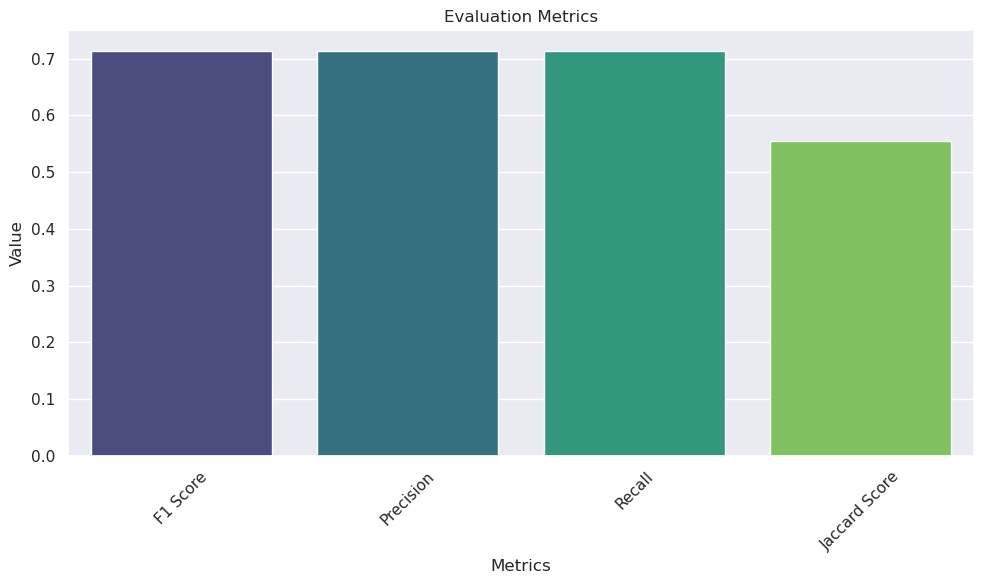

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, jaccard_score, log_loss

# Assuming you have defined y_test and y_pred

# Calculate the metrics
f1 = f1_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
jaccard = jaccard_score(y_test, y_pred, average='micro')

# Create a bar plot for the metrics
metrics = ['F1 Score', 'Precision', 'Recall', 'Jaccard Score']
values = [f1, precision, recall, jaccard]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Evaluation Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Get the top 10 importance feature whole the data**

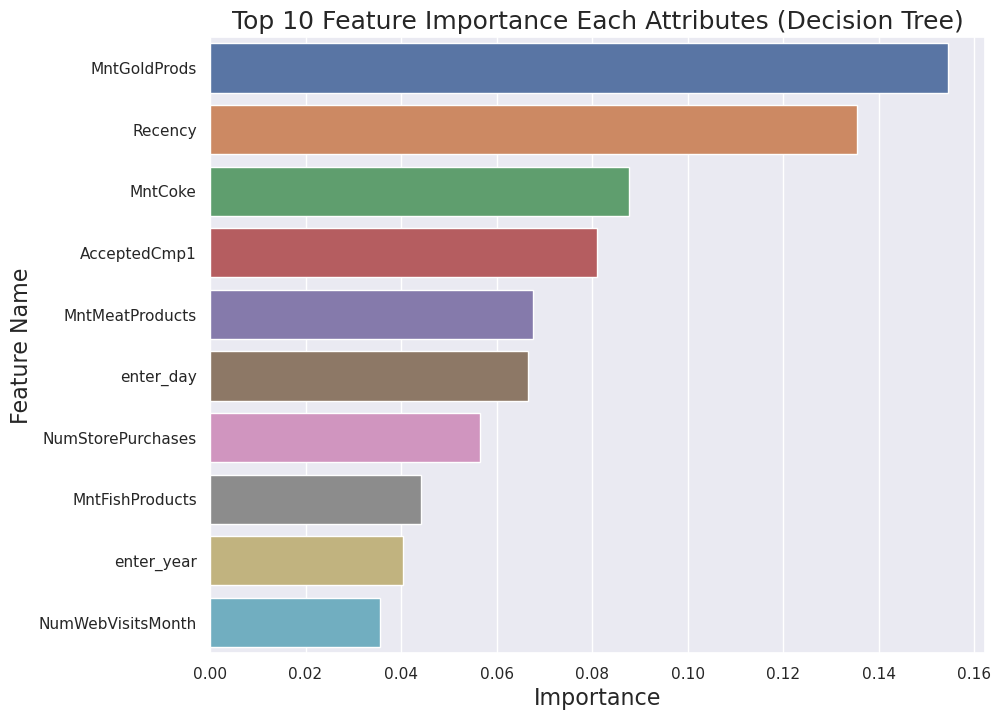

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

**Plot AUC / ROC**

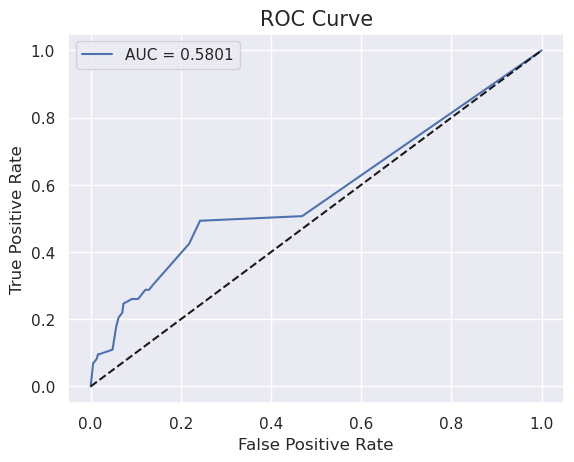

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# customer segmentation

 the process of dividing a customer base into distinct groups or segments based on shared characteristics, behaviors, or attributes. The goal of customer segmentation is to identify meaningful patterns within a diverse customer population so that businesses can tailor their marketing strategies, products, and services to better match the needs and preferences of each segment

![image](https://www.corporatevision-news.com/wp-content/uploads/2022/10/Customer-Segmentation.jpg)

**compute Elbow method**

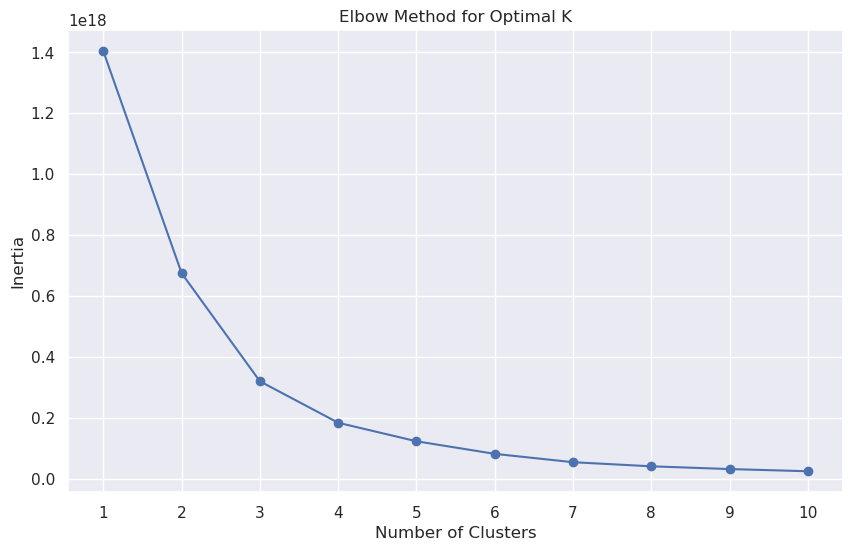

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Initialize an empty list to store inertia values
inertia = []

# Range of cluster numbers to test
num_clusters_range = range(1, 11)

# Compute K-means clustering and inertia for each cluster number
for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(data)  # Replace "data" with your actual data
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(num_clusters_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(num_clusters_range)
plt.show()

**compute silhouette score**

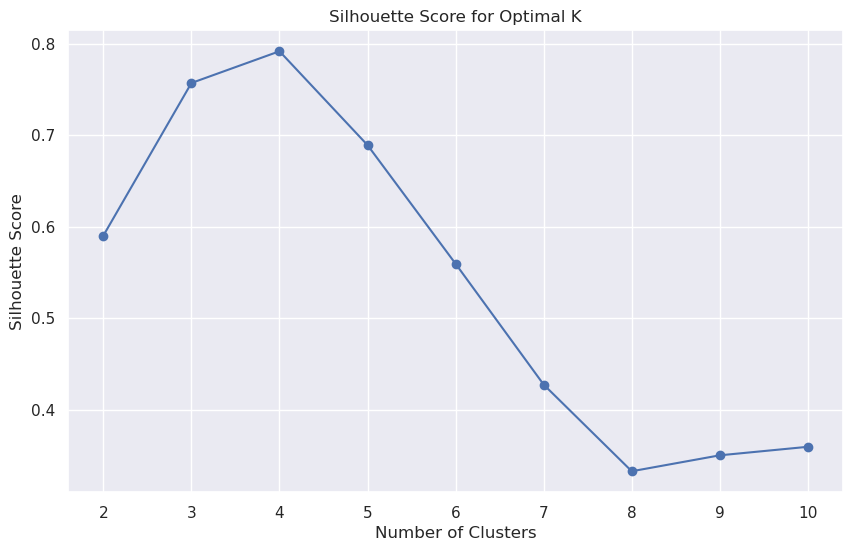

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.datasets import make_blobs

# Generate sample data (you would replace this with your own data)
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Range of cluster numbers to test
num_clusters_range = range(2, 11)

# Compute silhouette scores for different cluster numbers
silhouette_scores = []

for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette score graph
plt.figure(figsize=(10, 6))
plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(num_clusters_range)
plt.show()


 MAKE clustering to find the optimal number of clusters using silhouette scores, then applies clustering to sample data and plots the resulting clusters in a scatter plot with colors representing different clusters.

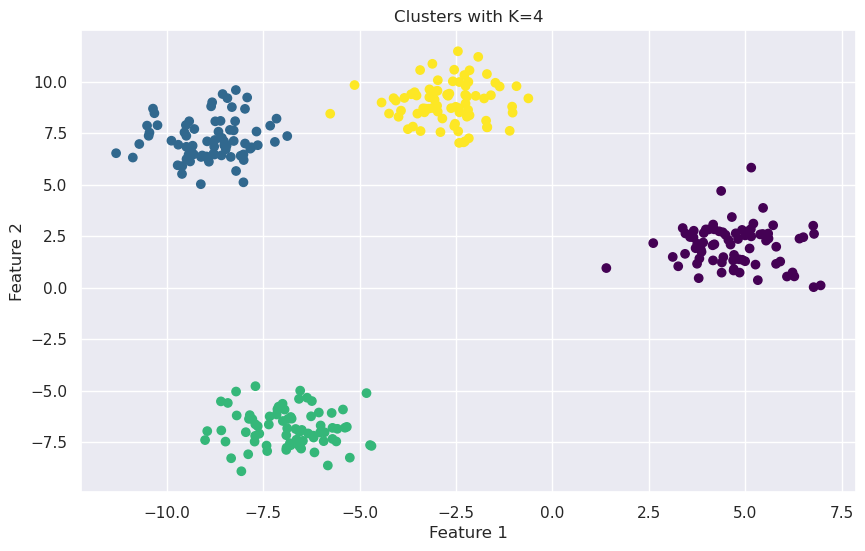

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

# Generate sample data (you would replace this with your own data)
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Range of cluster numbers to test
num_clusters_range = range(2, 11)

# Compute silhouette scores for different cluster numbers
silhouette_scores = []

for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the optimal cluster number with the highest silhouette score
best_k = num_clusters_range[np.argmax(silhouette_scores)]

# Perform K-means clustering with the best cluster number
best_kmeans = KMeans(n_clusters=best_k, random_state=42)
best_cluster_labels = best_kmeans.fit_predict(data)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], c=best_cluster_labels, cmap='viridis')
plt.title(f'Clusters with K={best_k}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
